# Análisis predictivo de series temporales
------

## Medidas de dependencia. Covarianza, autocorrelación, correlación cruzada.

In [2]:
install.packages("astsa")
library(astsa)

##Ajusto tamaño de figuras
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)

Installing package into 'C:/Users/Rodri/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rodri\AppData\Local\Temp\Rtmpo55q2M\downloaded_packages


### bloque de markdown corrido sobre el kernel de R para probar push de cambios
Aca estoy probando como hacer un texto corto en markdown. Para eso 
- pongo create markdown
- pongo ### para que sea un titulo de tipo 3
- pongo - para ir armando una lista
- pongo ctrl+enter para compilar

In [3]:
print('Hello world')

[1] "Hello world"


## Repaso: Variables aleatorias conjuntas.

Cuando definimos espacio muestral, comentamos que $\Omega$ tiene "todo lo que puede pasar" en nuestro experimento. Ahora, podemos tener varias variables aleatorias que surjan como medidas de realizar *el mismo experimento*. En este caso las v.a. están definidas sobre un mismo espacio de probabilidad y se denominan v.a. *conjuntas*.

**Ejemplo:**
* Experimento: extraer una persona al azar de la población
* Variables: $X=$ altura, $Y=$ peso de la persona.

Podría también tomarse $Z=$ índice de masa corporal $=Y/X^2 = g(X,Y)$, una tercera v.a. que es función de las anteriores.

### Función de densidad conjunta

Cuando las variables se comportan de manera conjunta, la noción de densidad es más complicada. Es una función de todas las posibles combinaciones de valores $(x_1,\ldots,x_n)$:

> **Definición:** Una conjunto de variables aleatorias $(X_1,\ldots,X_n)$ tiene *densidad conjunta* $f(x_1,\ldots,x_n)$ si y solo si para toda región $R\subset \mathbb{R}^n$:
>
> $$ P(X \in R) = \int\cdots\int_R f(x_1,\ldots,x_n)dx_1\ldots dx_n$$
>

La función $f$ de densidad me indica como se reparte la masa en el espacio $(x_1,\ldots,x_n)$. Normalmente esto lo visualizamos haciendo "nubes de puntos" con muestras de la variable conjunta.

### Densidad Marginal

Si dos variables (o más) tienen densidad conjunta $f(x,y)$, se pueden obtener sus densidades marginales, es decir, la de cada una por separado. Se hace integrando sobre todos los posibles valores de la(s) otra(s) variables.

Por ejemplo, si $(X,Y)\sim f(x,y)$ entonces:

 $$f_X(x) = \int_{-\infty}^\infty f(x,y) dy$$

 $$f_Y(y) = \int_{-\infty}^\infty f(x,y) dx$$


#### Ejemplo

Supongamos que elegimos puntos al azar completamente en el cuadrado $[0,1]\times[0,1]$. Esto corresponde a sortear de manera uniforme sus coordenadas.

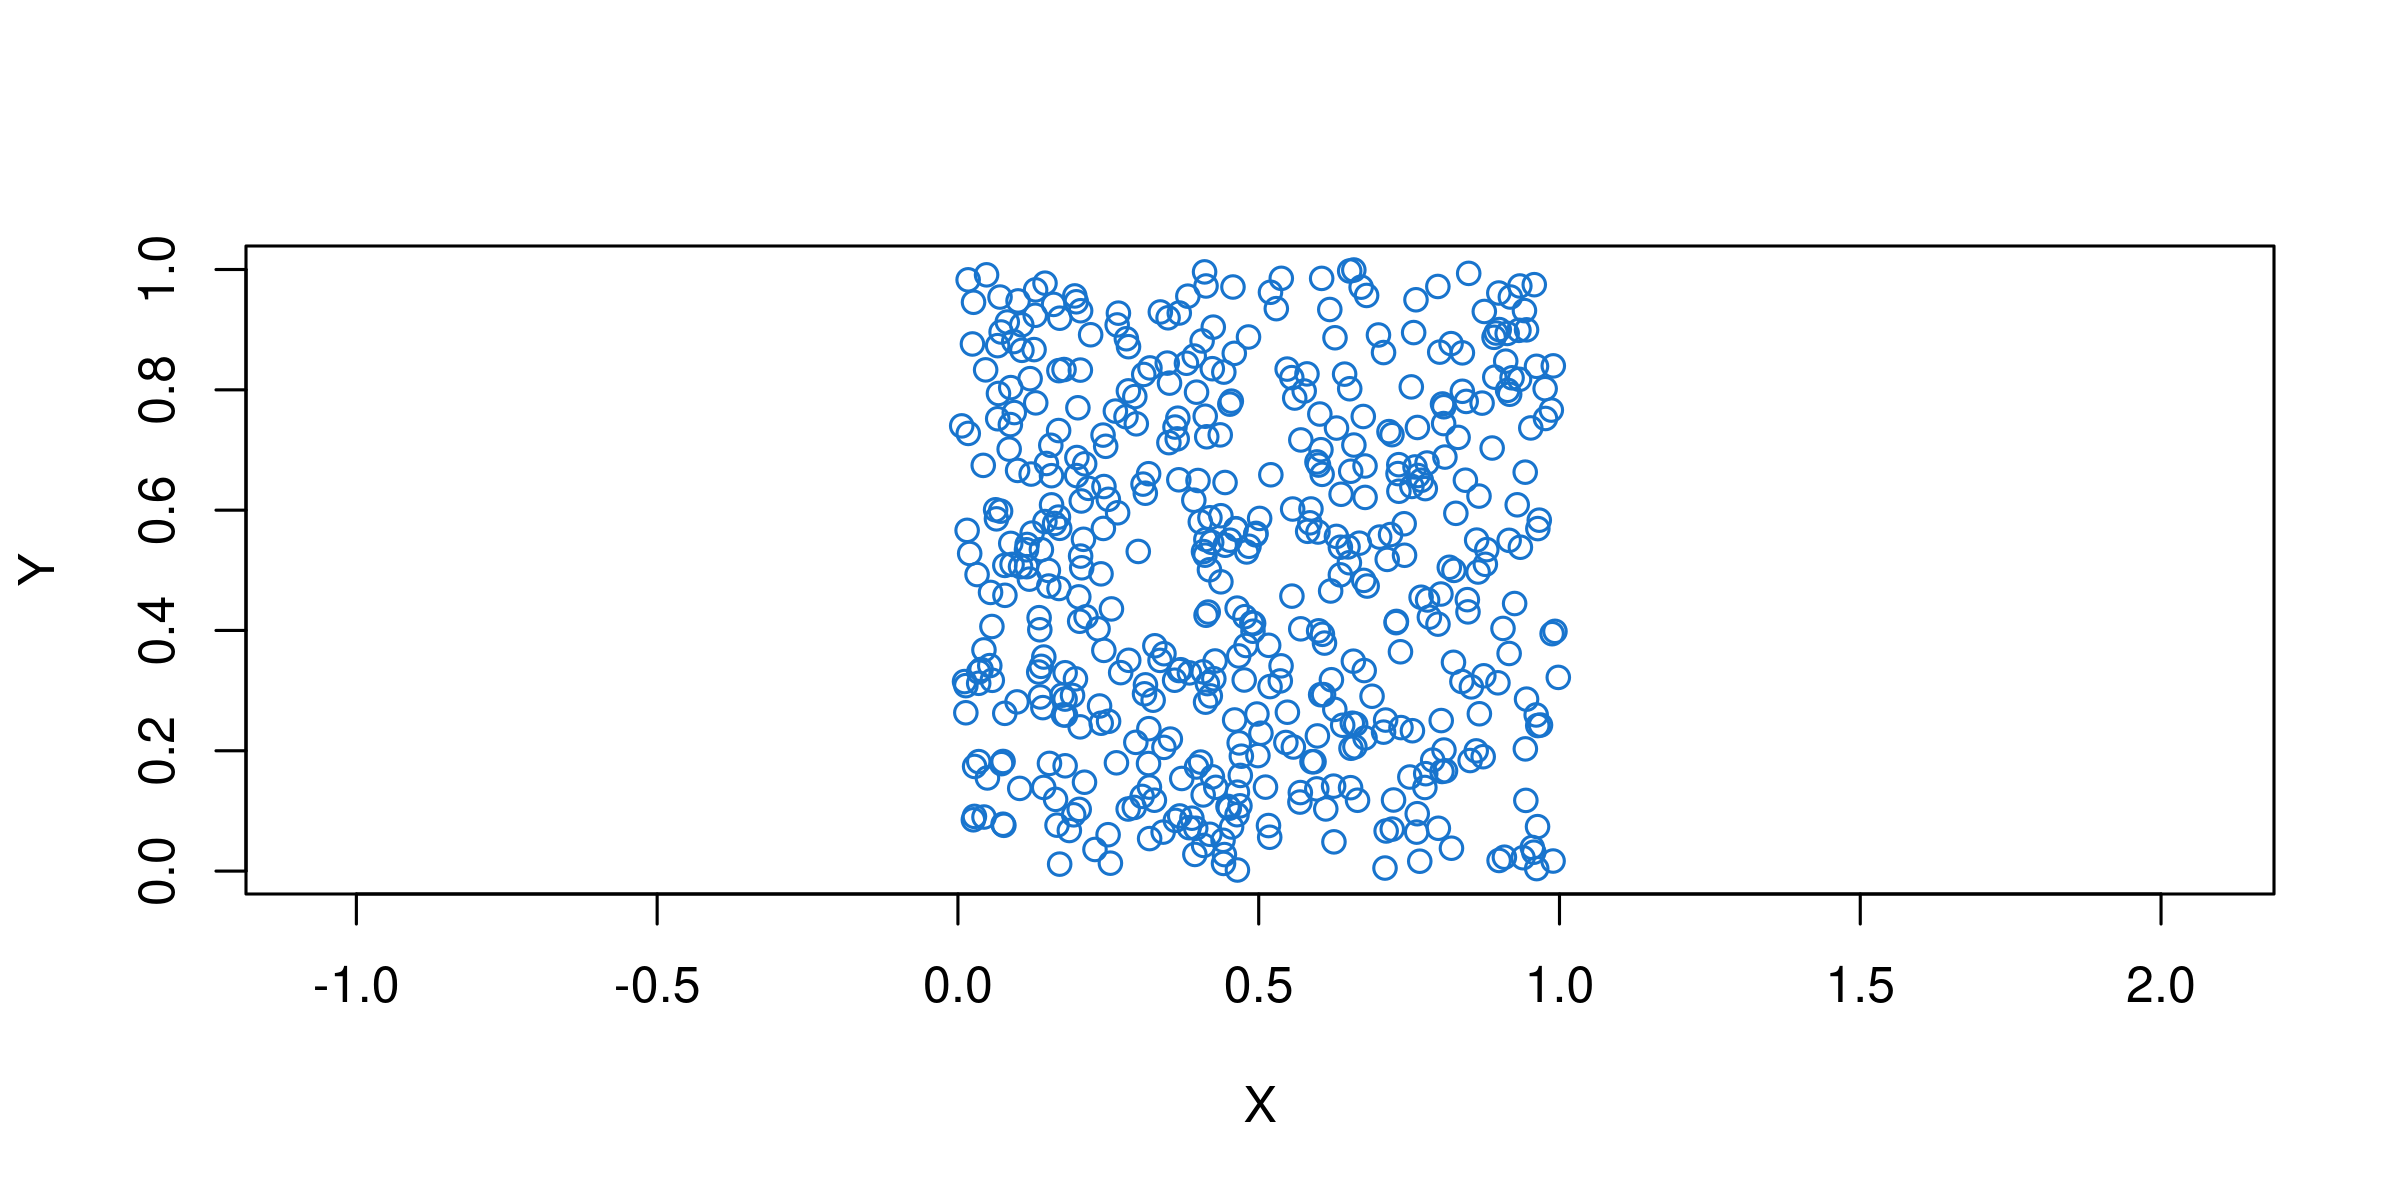

In [2]:
## sorteo uniforme las coordenadas
X=runif(500) #500 puntos entre 0 y 1 uniformes
Y=runif(500) #500 puntos más para la otra coordenada

plot(X,Y, col=4, asp="1") #asp=1 dibuja ambas componentes en la misma escala

#### Histogramas:

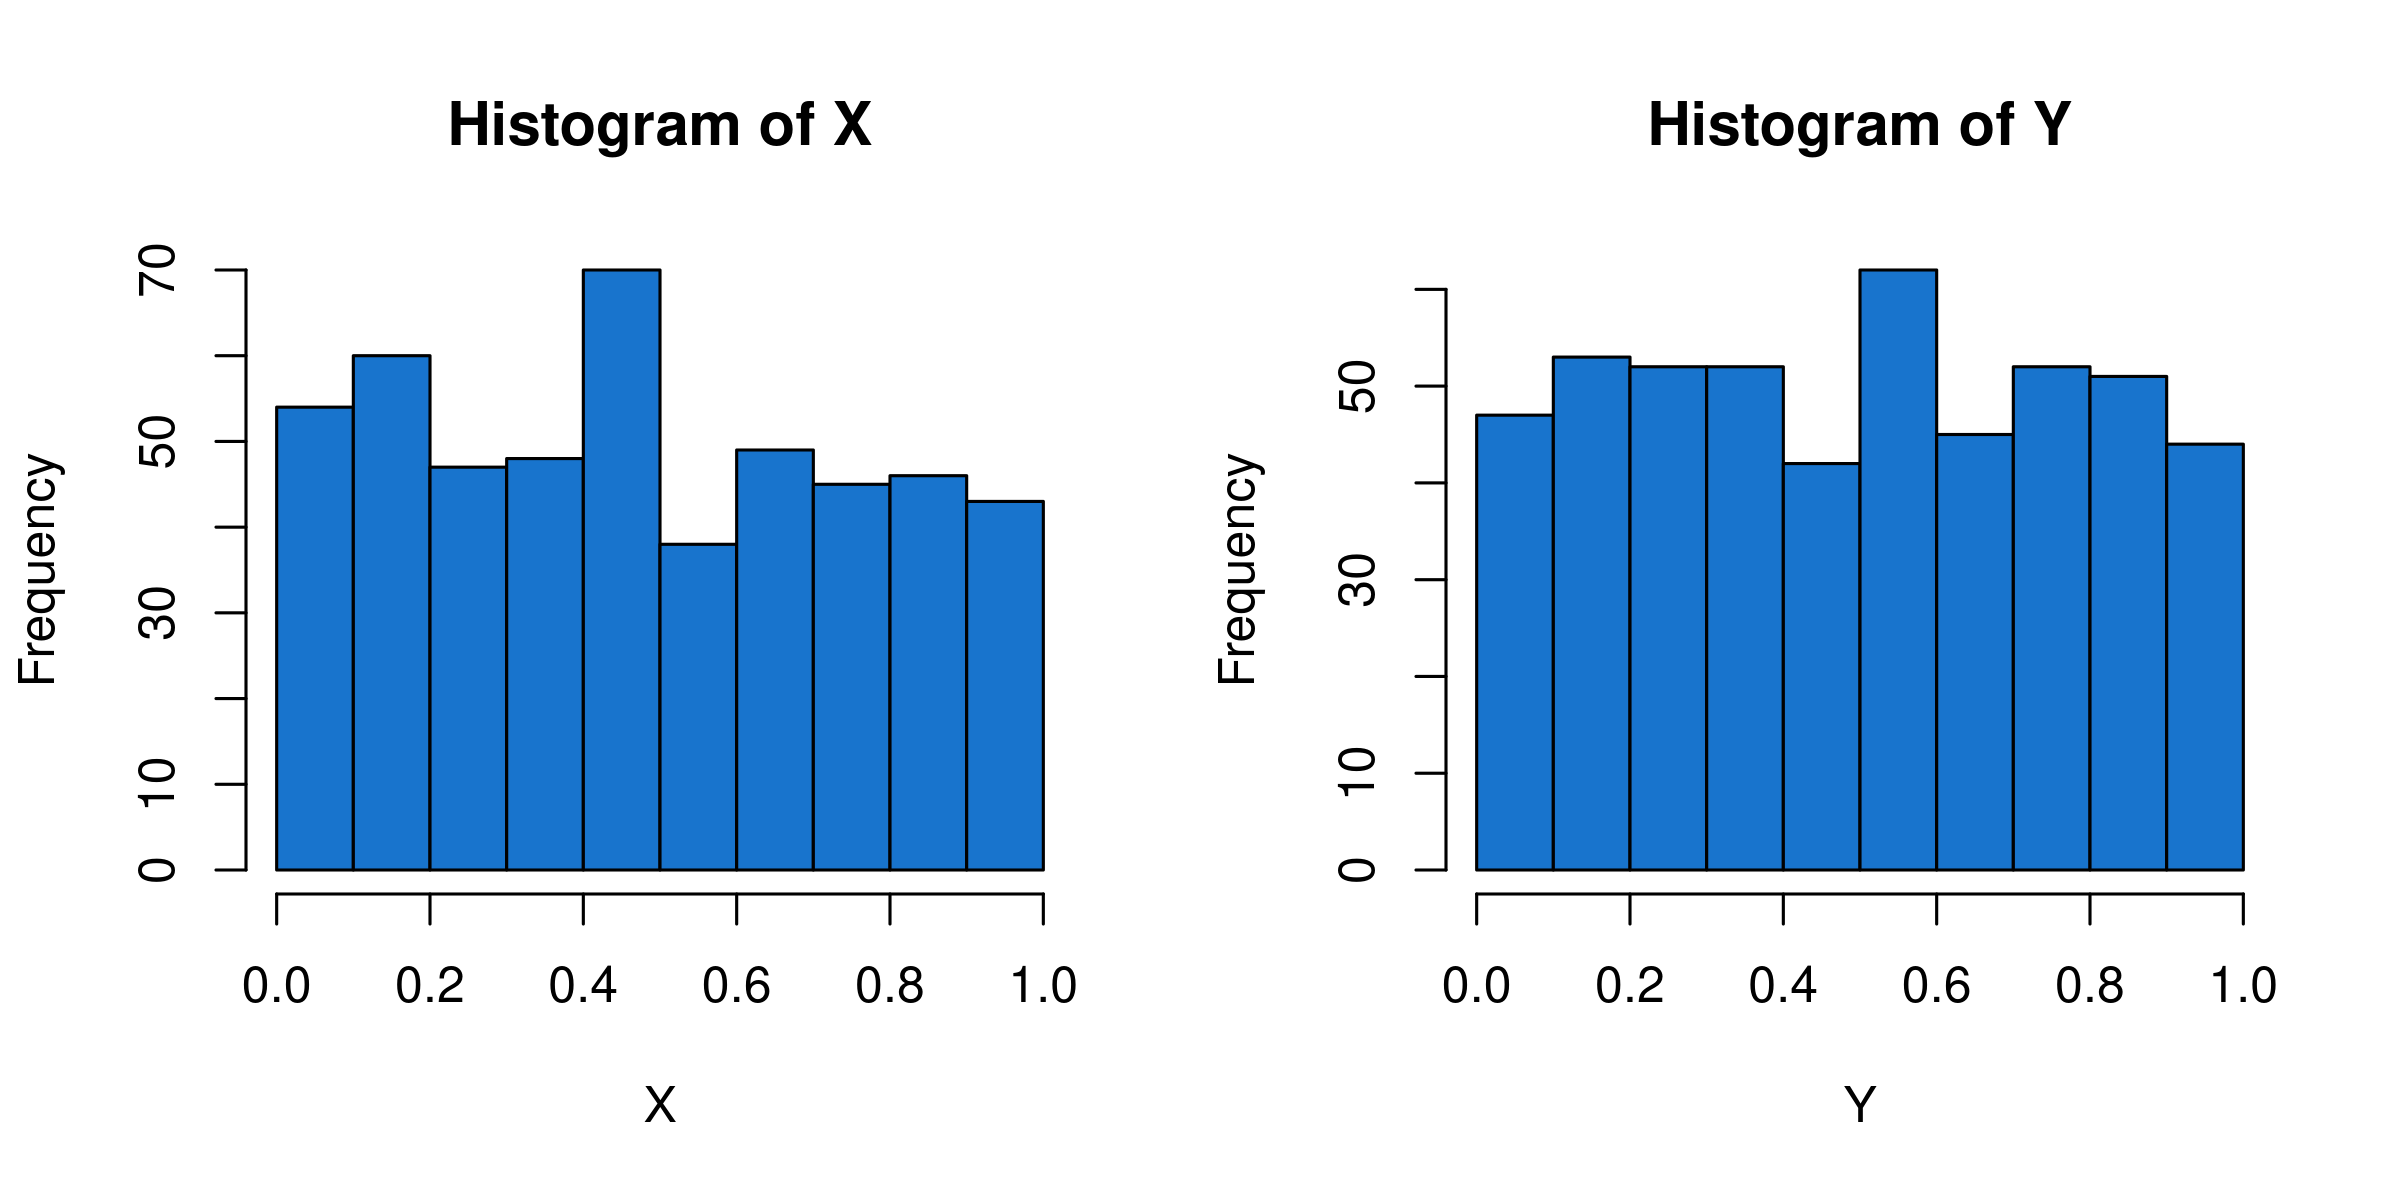

In [3]:
par(mfrow=c(1,2))
hist(X, col=4)
hist(Y, col=4)

### Media y varianza

La media y varianza de variables se definen como antes, usando las marginales:

$$\mu_X = E[X]  = \int xf_X(x)dx = \iint x f(x,y)dxdy$$

$$\mu_Y = E[Y]  = \int yf_Y(y)dx = \iint y f(x,y)dxdy$$

$$\sigma^2_X = E[(X-\mu_X)^2], \quad \sigma^2_Y = E[(Y-\mu_Y)^2].$$

Y en general para cualquier función $g:\mathbb{R}^2\to \mathbb{R}$ que dependa de ambas variables:

$$E[g(X,Y)] = \iint g(x,y)f(x,y) dxdy.$$



### Independencia de variables aleatorias

Dos variables son independientes si y solo si conocer el valor de una no afecta la distribución de la otra variable. Es decir, saber el resultado de una no cambia mi percepción sobre la otra, sigue teniendo la misma distribución que antes.

Esto se cumple si y solo si vale la siguiente regla producto:

$$f(x,y) = f_X(x) f_Y(y)$$

En ese caso, $P(X\in A,Y\in B) = P(X\in A)P(X\in B)$ para cualquier suceso $A,B$ y en particular:

$$P(Y\in B \mid X=x) = P(Y\in B)$$

que es lo que pide la definición.


#### Ejemplo

En el ejemplo de las coordenadas en $[0,1]\times[0,1]$ precisamente sorteamos $X$ e $Y$ de manera independiente, por lo cual saber la coordenada $X$ no cambia mi percepción sobre la coordenada $Y$ (sigue siendo Uniforme en [0,1]).

Veamos ejemplos donde esto **no** ocurre, es decir que hay *información cruzada*.

Para ello, tomemos una transformación de los puntos anteriores:

$$U = X+Y, \quad V = X-Y.$$

¿Estas variables serán independientes?

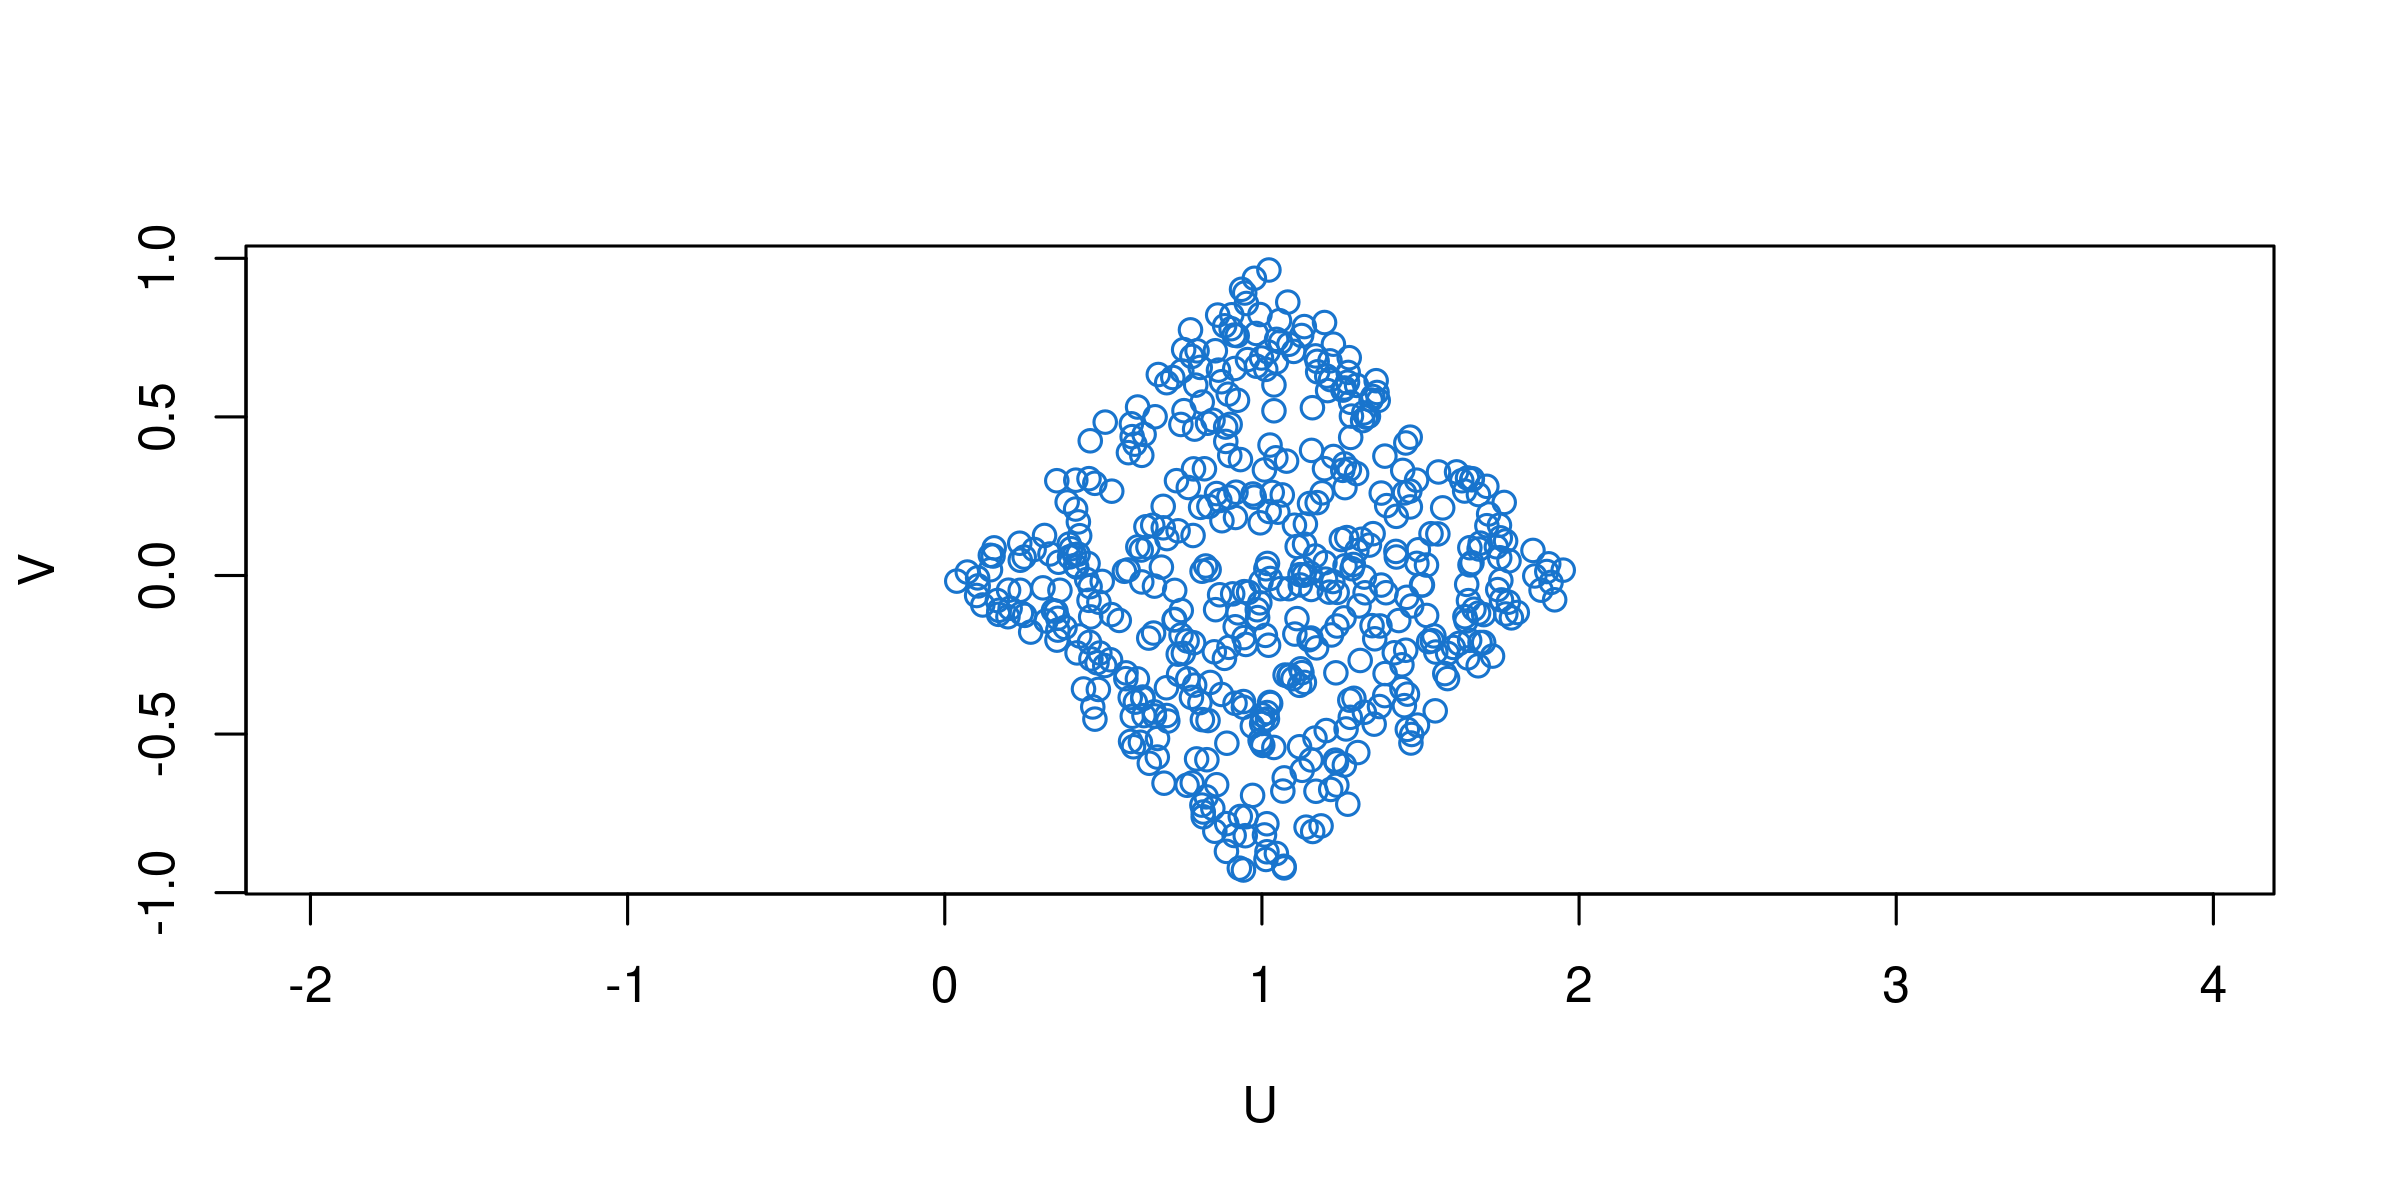

In [4]:
## sorteo uniforme las coordenadas
X=runif(500) #500 puntos entre 0 y 1 uniformes
Y=runif(500) #500 puntos más para la otra coordenada

U=X+Y
V=X-Y

plot(U,V, col=4, asp="1") #asp=1 dibuja ambas componentes en la misma escala

#### Histogramas:

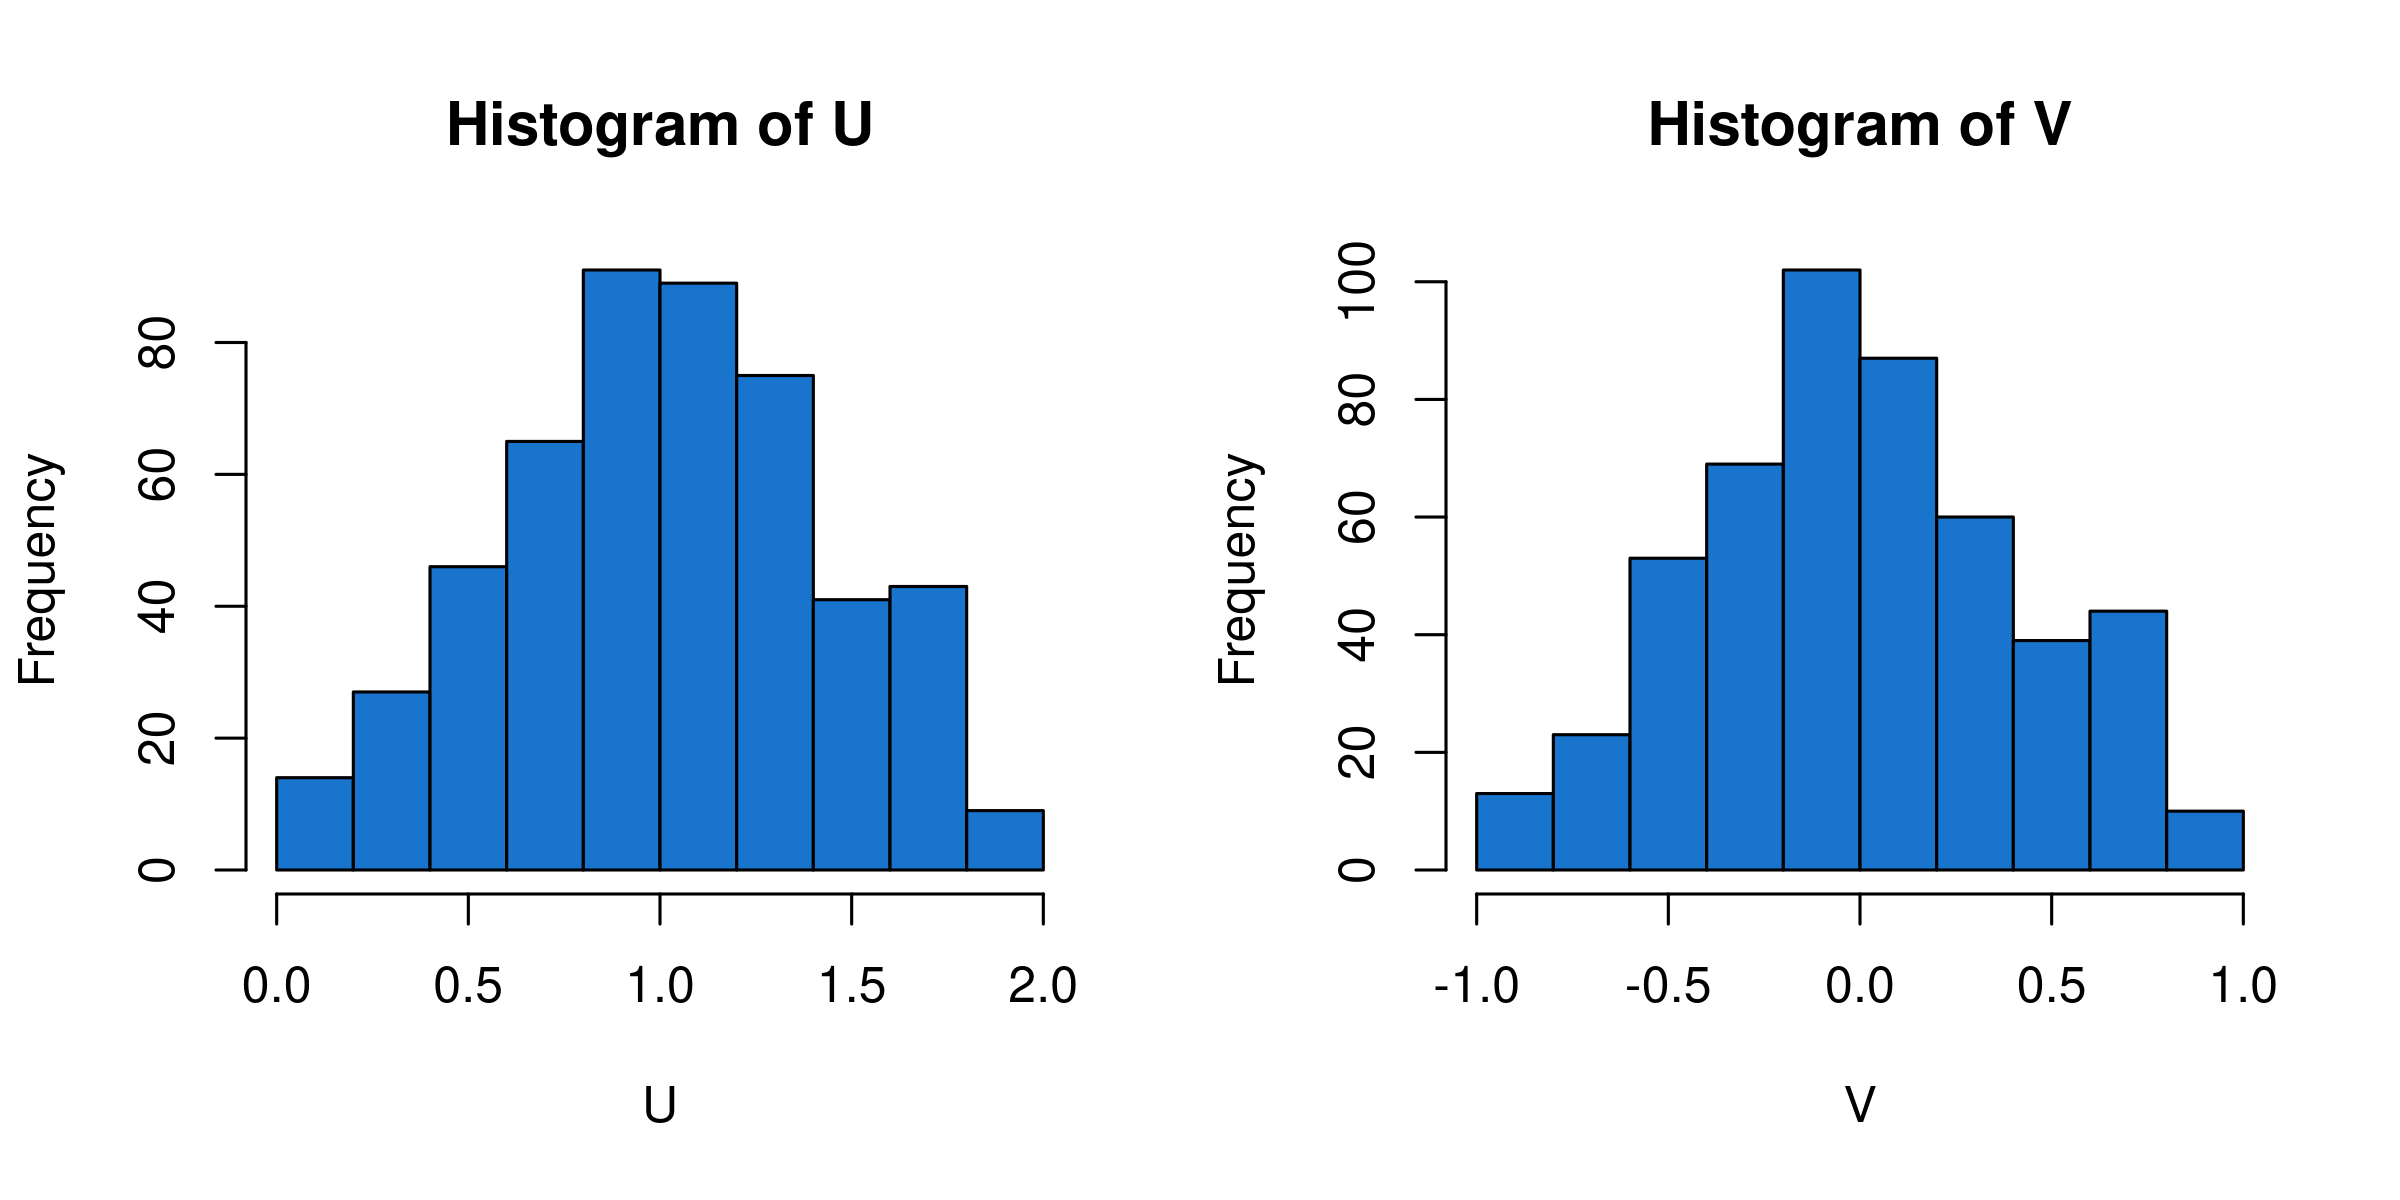

In [5]:
par(mfrow=c(1,2))
hist(U, col=4)
hist(V, col=4)

### Ejemplo de no independencia:

* Las variables $U$ y $V$ así construidas tienen una distribución marginal en forma de triángulo.
* La suma $U$ va entre $0$ y $2$ con valor más probable $1$.
* La resta $V$ va entre $-1$ y $1$ con valor más probable $0$.

Además **no son independientes**: observemos tanto $X$ como $Y$ participan en la construcción de $U$ y $V$ por lo que es de esperar que esto ocurra.

En particular que si sabemos que $U$ es grande (la suma está cerca de $2$) entonces tanto $X$ como $Y$ tienen que estar cerca de $1$, por lo que su diferencia debe estar cerca de $0$!!!!

De este modo hay información cruzada.

## Covarianza: una medida de dependencia.

Dadas dos variables aleatorias $X$ e $Y$ conjuntas, definimos la *covarianza* entre ellas como:

$$\mathrm{Cov}(X,Y) = E[(X-\mu_X)(Y-\mu_Y)].$$

Es decir, cuánto varía en promedio el producto de los desvíos respecto a la media.

**Idea:**
 * Si dos variables están asociadas de modo que valores altos de una (respecto a su media) producen valores altos de la otra (respecto a su media), tendrán covarianza alta y positiva.
 
 * Si dos variables están asociadas negativamente, es decir, valores altos de una (respecto a su media) produce valores bajos de la otra (respecto a su media), tendrán covarianza alta y negativa.
 
 * Si dos variables son independientes, su covarianza será 0.
 
 
Si tenemos $(X_1,\ldots,X_n)$ conjuntas, a la matriz $\Sigma$ de todas las covarianzas entre ellas se le llama *matriz de covarianzas*. En la diagonal tenemos $\mathrm{Cov}(X_i,X_i) = \mathrm{Var}(X_i)$.

#### Propiedad de la covarianza (combinaciones lineales):

Si $U = \sum_{j=1}^m a_j X_j$ y $V = \sum_{k=1}^n b_k Y_k$ son v.a. que resultan de combinar linealmente $\{X_j:j=1,\ldots,m\}$ y $\{Y_k:k=1\ldots,n\}$ entonces:

$$\textrm{Cov}(U,V) = \sum_{j=1}^m \sum_{k=1}^n a_jb_k \textrm{Cov}(X_j,Y_k).$$

Observar que lo anterior puede ponerse como $\textrm{Cov}(U,V) = a^T \Sigma b$ siendo $a$ y $b$ vectores columna y $\Sigma$ una matriz $m\times n$ cuyas entradas son las covarianzas.

En particular, si $X$ es un vector aleatorio con matriz de covarianzas $\Sigma$, y $U=a^T X$, $\textrm{Var}(U) = a^T \Sigma a$ (interpretando $a$ como vector columna).

#### Ejemplo

Si quiero calcular $\textrm{Cov}(X+Y, X-Y)$ tengo que hacer:

$$\begin{align*}
\textrm{Cov}(X+Y,X-Y) &= \textrm{Cov}(X,X) - \textrm{Cov}(X,Y) + \textrm{Cov}(Y,X) - \textrm{Cov}(Y,Y) \\
                      &= \textrm{Var}(X) - \textrm{Var}(Y)
\end{align*}$$

en este caso.

### Coeficiente de correlación

La covarianza tiene las mismas unidades que la varianza, y puede ser más grande o más chica dependiendo de la variabilidad intrínseca de $X$ e $Y$. Es por eso que se define el *coeficiente de correlación*:

$$\rho(X,Y) = \frac{\mathrm{Cov}(X,Y)}{\sqrt{\mathrm{Var}(X)}\sqrt{\mathrm{Var}(Y)}}.$$

Este tiene las siguientes propiedades:

* $-1\leqslant \rho(X,Y)\leqslant 1$.
* Si $X,Y$ independientes, $\rho(X,Y)=0$.
* $\rho(X,Y) = 1$ si y solo si $Y = aX+b$ para cierto $a>0$ y $b\in \mathbb{R}$.
* $\rho(X,Y) = -1$ si y solo si $Y = aX+b$ para cierto $a<0$ y $b\in \mathbb{R}$.

#### Ejemplo

Estimemos la covarianza a partir de los datos y el coeficiente de correlación para las coordenadas $(X,Y)$ sorteadas anteriormente:

In [6]:
print(paste("La covarianza es:", cov(X,Y)))
print(paste("El coeficiente de correlación es:", cor(X,Y)))

[1] "La covarianza es: 0.00100524219244197"
[1] "El coeficiente de correlación es: 0.0115412674738694"


#### Ejemplo

¿Qué ocurre si lo hacemos para $U$ y $V$, los transformados?

In [7]:
print(paste("La covarianza es:", cov(U,V)))
print(paste("El coeficiente de correlación es:", cor(U,V)))

[1] "La covarianza es: 0.00632951548039959"
[1] "El coeficiente de correlación es: 0.0363132954298863"


**Observación**: baja correlación no implica independencia!!!! Pero independencia implica baja correlación (0).

### Ejemplo: vectores aleatorios Gaussianos.

Un vector aleatorio Gaussiano $X=(X_1,\ldots,X_n)$ es la generalización de la distribución normal a múltiples dimensiones. Está caracterizado por:

 * Un vector de medias $\mu$ que dice el centro de cada una de las coordenadas.
 * Una matriz de covarianzas $\Sigma$ que tiene:
    * En la diagonal, las varianzas de cada componente.
    * Fuera de la diagonal, la covarianza de cada par de coordenadas (por lo tanto es simétrica).

En `R` podemos sortear vectores gaussianos usando la biblioteca `mvtnorm`.

#### Ejemplo

Tomemos dos variables con $\mu=(0,0)$ (centradas) y con matriz de covarianzas:

$$\Sigma = \begin{pmatrix} 9 & 0 \\ 0 & 1 \end{pmatrix}$$

Es decir, la primera componente tiene más varianza que la segunda, y su covarianza es $0$.

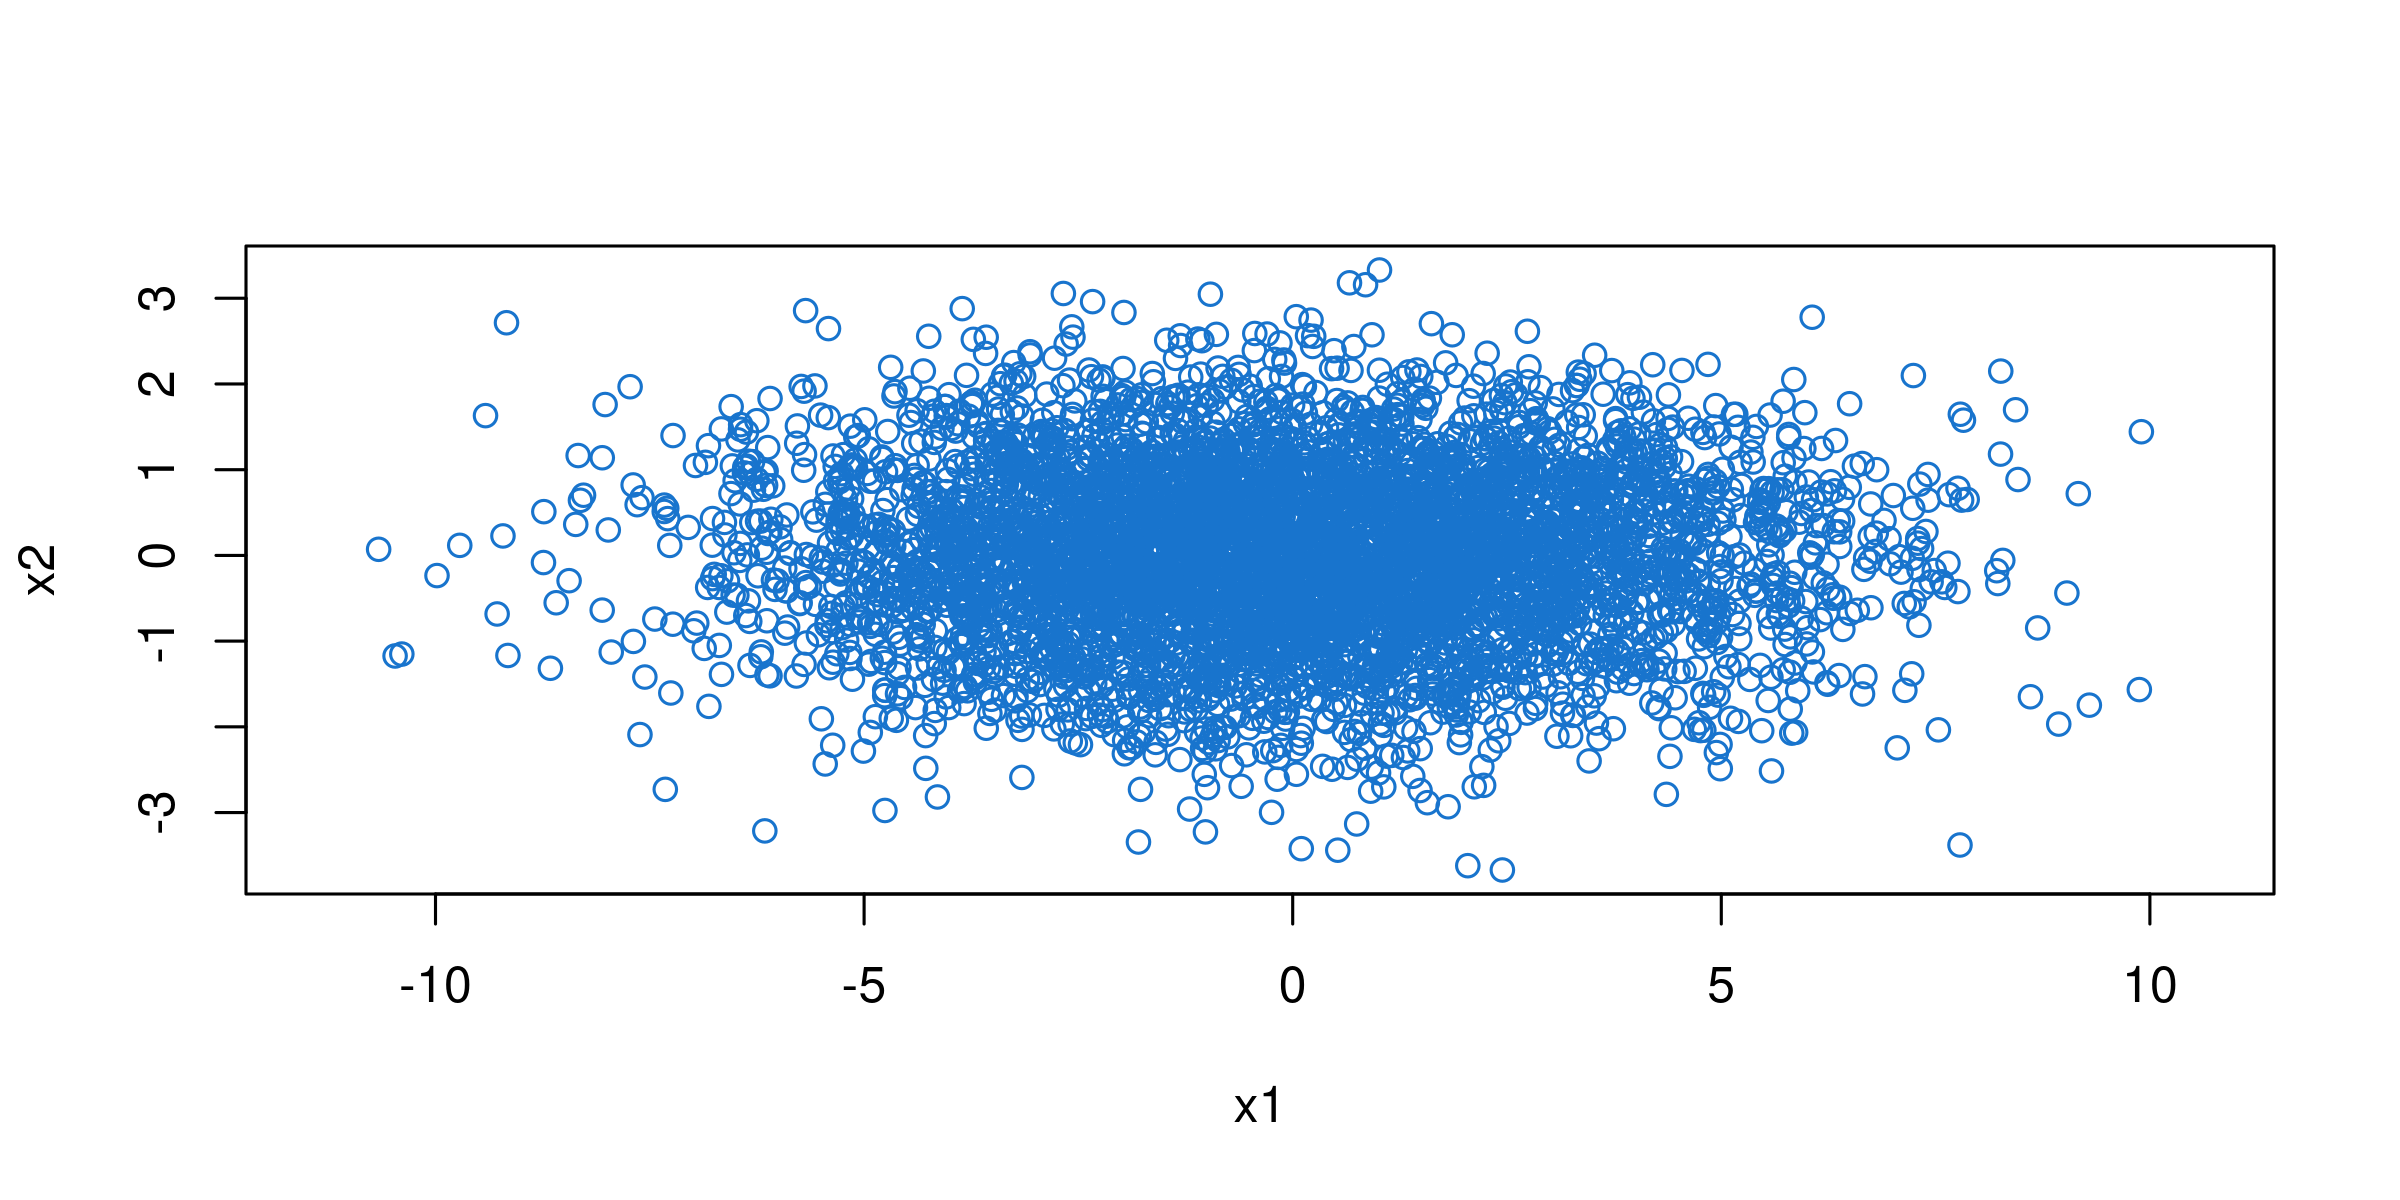

In [8]:
#Descomentar si no esta instalado el paquete
#install.packages("mvtnorm")
#llama a la biblioteca Normal Multivariada
library(mvtnorm)
mu=c(0,0)
sigma = cbind(c(9,0), c(0,1))
x <- rmvnorm(n=5000, mean=mu, sigma=sigma)

plot(x, col=4, asp=1, xlab="x1", ylab="x2") #plotea los puntos con unidades iguales en x e y.

[1] "Media de x1: -0.078021.   Media de x2: -0.001714"

[1] "Varianza de x1: 8.957398.  Varianza de x2: 1.005462"

[1] "Covarianza: -0.037979.  Correlación: -0.012655"

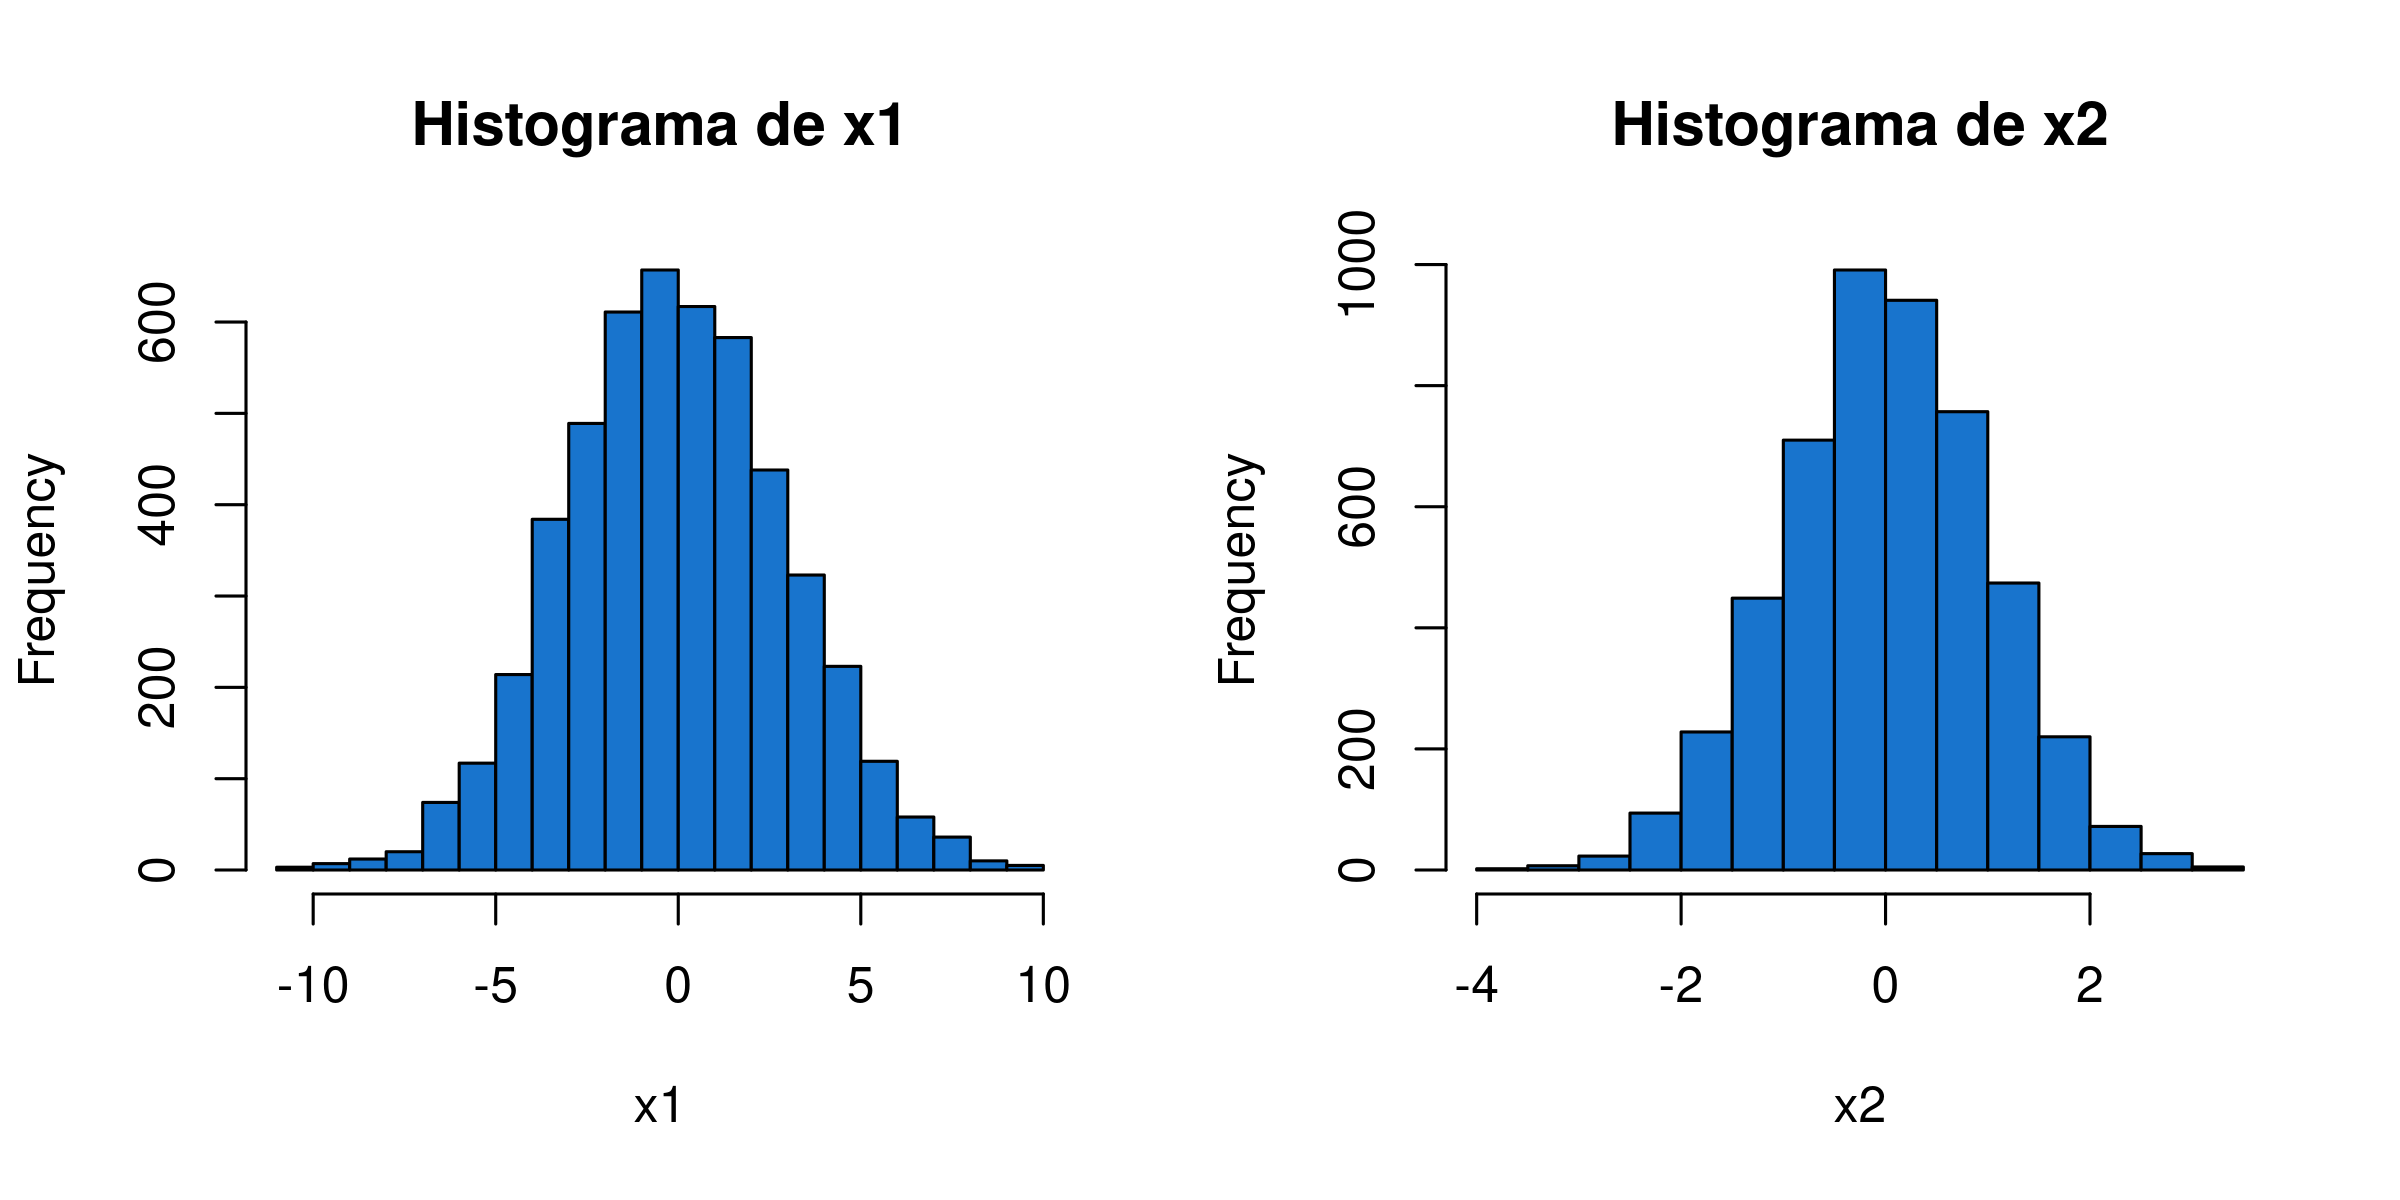

In [9]:
par(mfrow=c(1,2))

hist(x[,1],breaks=20,col=4, main="Histograma de x1", xlab="x1")
hist(x[,2],breaks=20,col=4, main="Histograma de x2", xlab="x2")

sprintf('Media de x1: %3.6f.   Media de x2: %3.6f', mean(x[,1]), mean(x[,2]))
sprintf('Varianza de x1: %3.6f.  Varianza de x2: %3.6f', var(x[,1]), var(x[,2]))
sprintf('Covarianza: %3.6f.  Correlación: %3.6f', cov(x[,1],x[,2]), cor(x[,1],x[,2]))


#### Ejemplo

Tomemos dos variables con $\mu=(0,0)$ (centradas) y con matriz de covarianzas:

$$\Sigma = \begin{pmatrix} 3 & -2 \\ -2 & 2 \end{pmatrix}$$

Las varianzas son más parecidas entre sí y tienen correlación negativa.

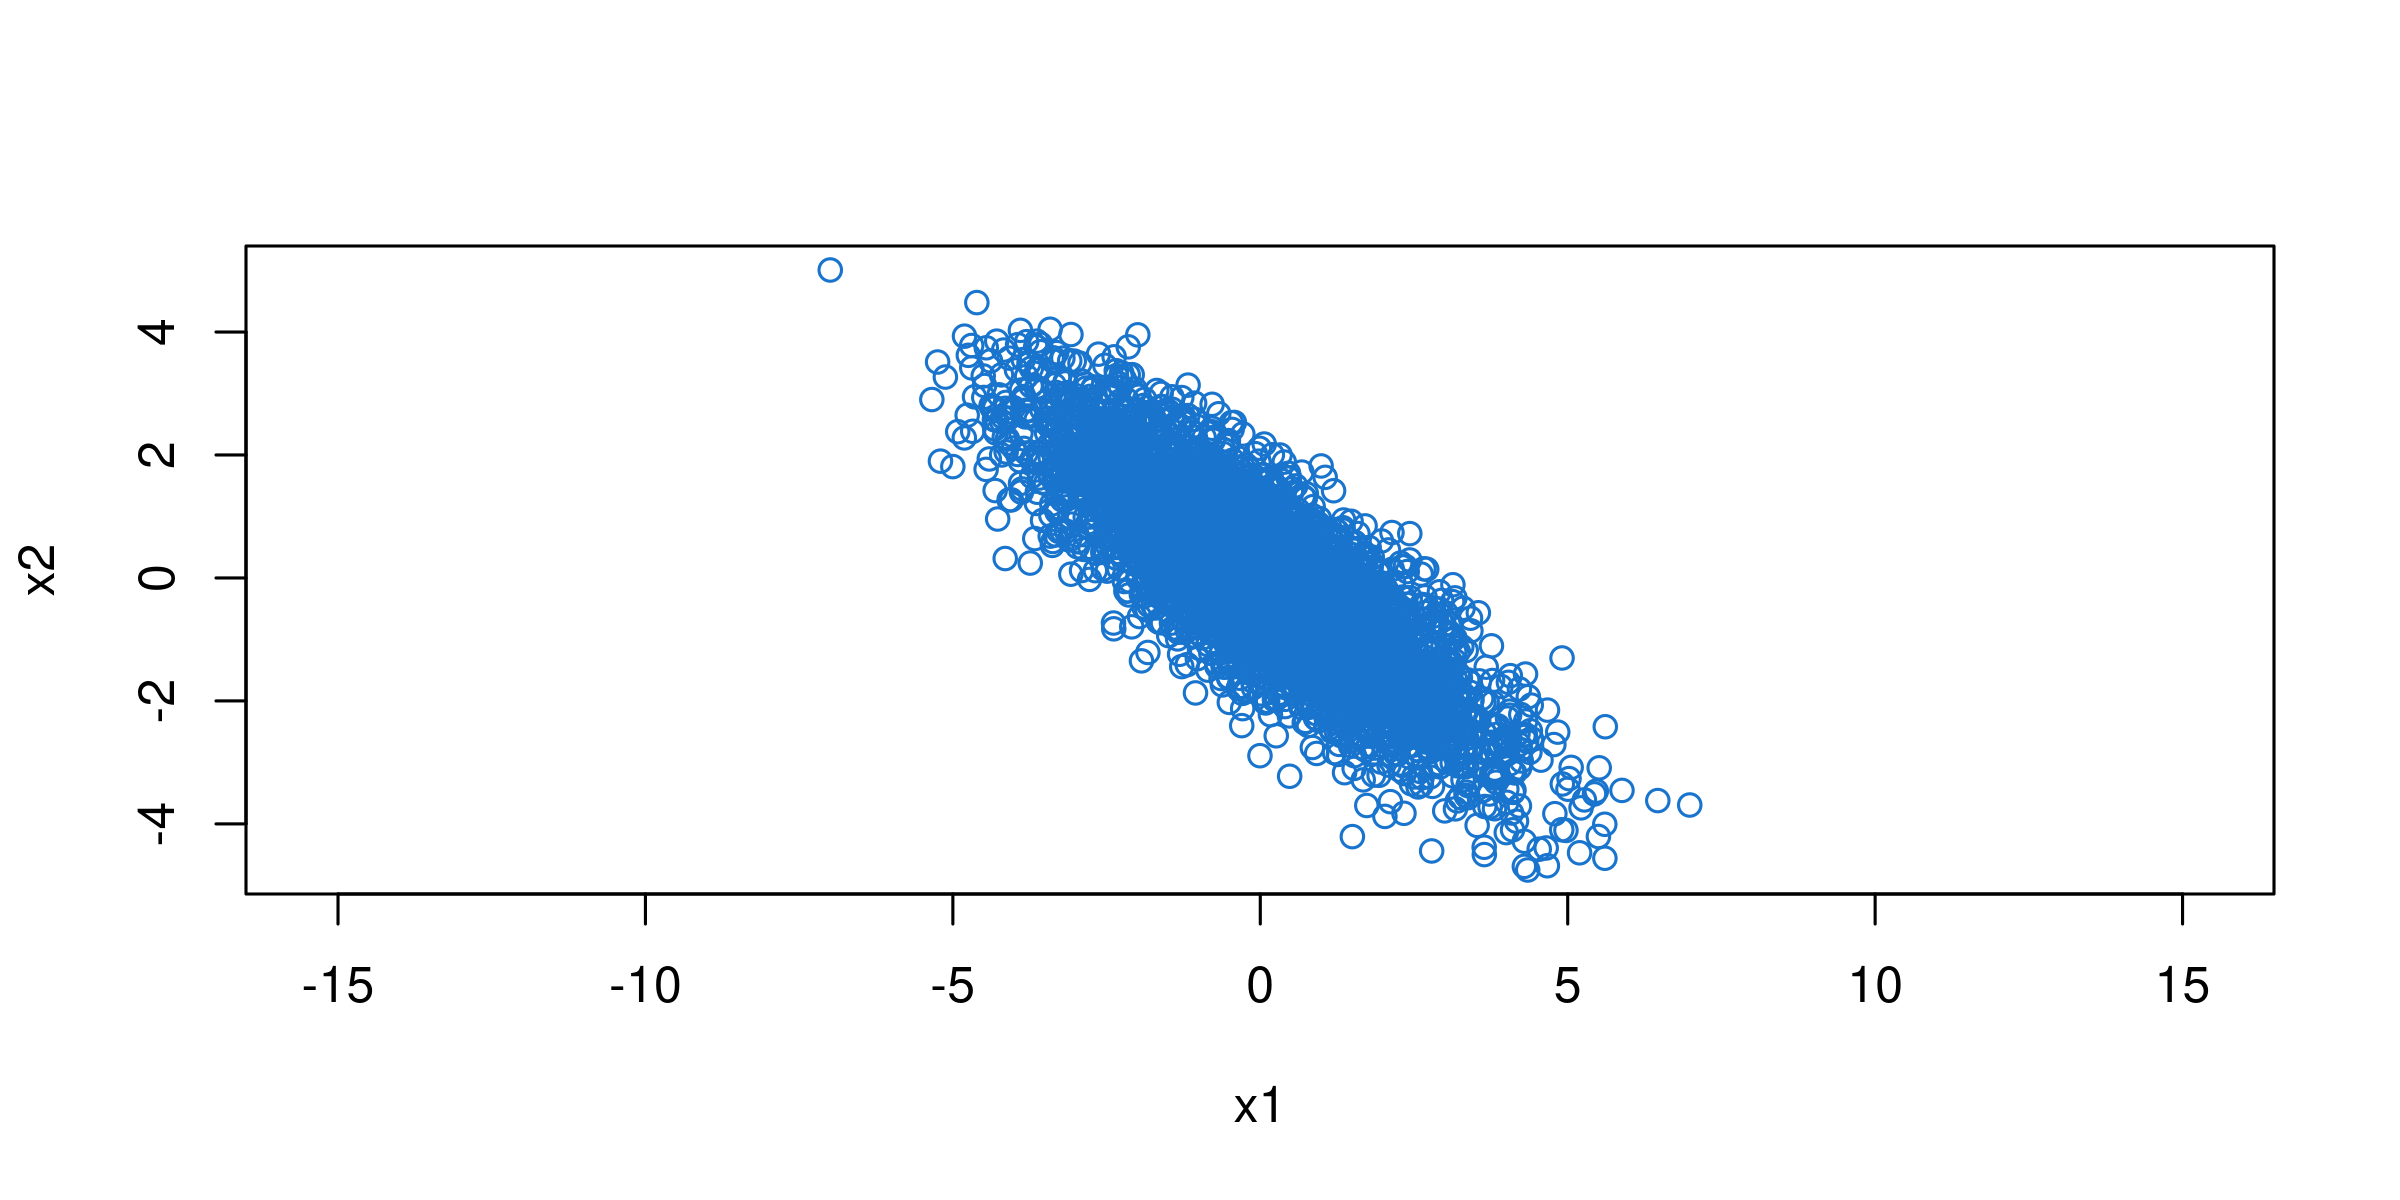

In [10]:
mu=c(0,0)
sigma = cbind(c(3,-2), c(-2,2))
x <- rmvnorm(n=5000, mean=mu, sigma=sigma)

plot(x, col=4, asp=1, xlab="x1", ylab="x2") #plotea los puntos con unidades iguales en x e y.

[1] "Media de x1: 0.005409.   Media de x2: -0.019011"

[1] "Varianza de x1: 3.044370.   Varianza de x2: 1.996139"

[1] "Covarianza: -2.016886.  Correlación: -0.818158"

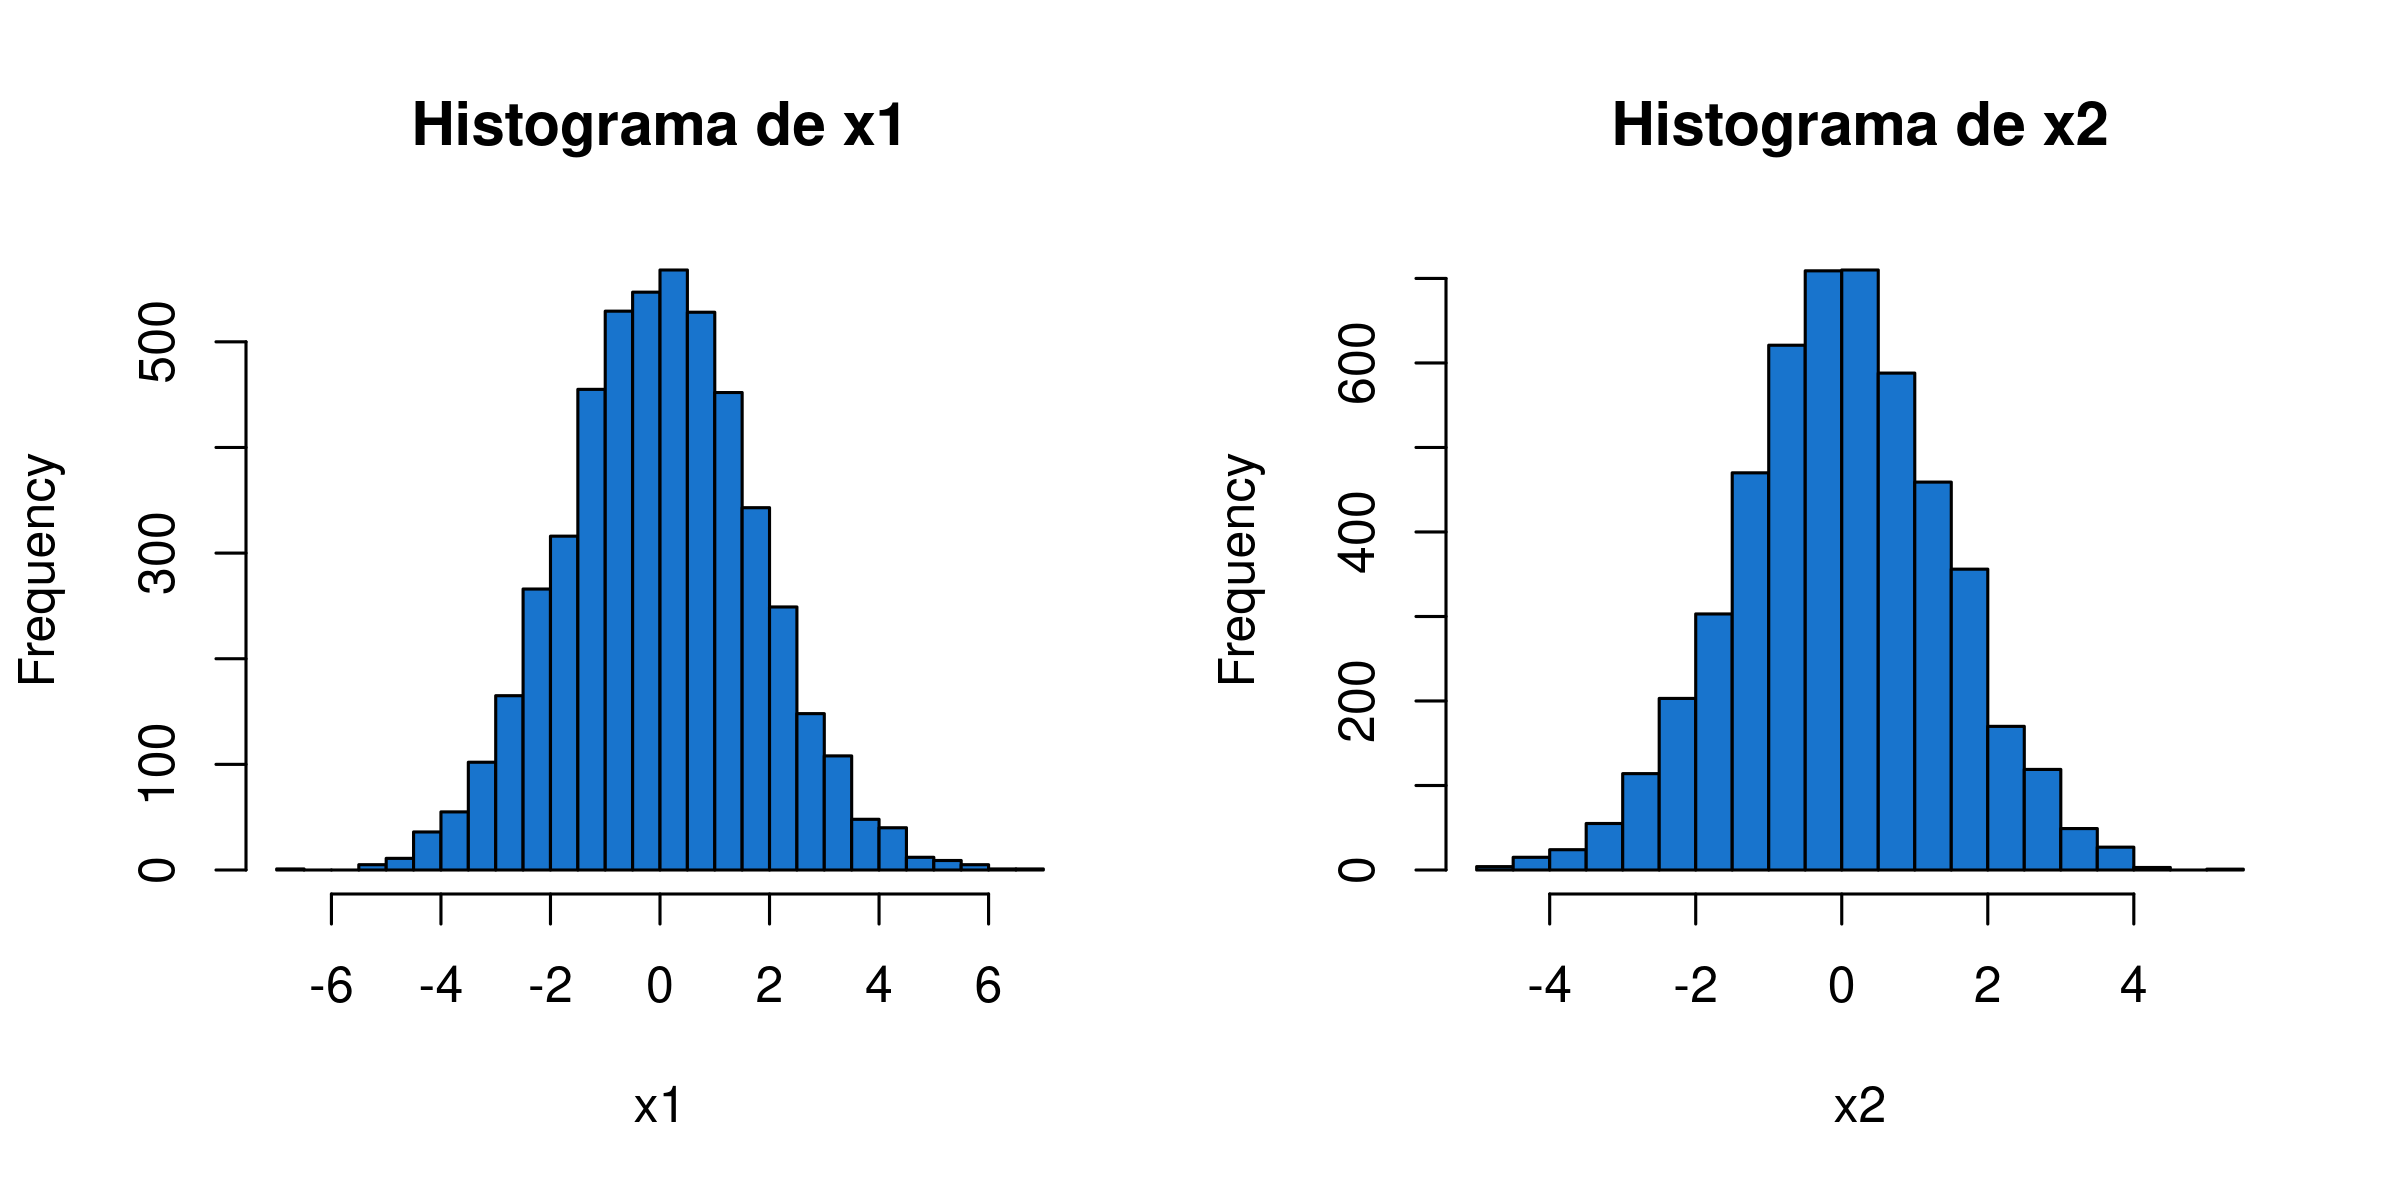

In [11]:
par(mfrow=c(1,2))

hist(x[,1],breaks=20,col=4, main="Histograma de x1", xlab="x1")
hist(x[,2],breaks=20,col=4, main="Histograma de x2", xlab="x2")

sprintf('Media de x1: %3.6f.   Media de x2: %3.6f', mean(x[,1]), mean(x[,2]))
sprintf('Varianza de x1: %3.6f.   Varianza de x2: %3.6f', var(x[,1]), var(x[,2]))
sprintf('Covarianza: %3.6f.  Correlación: %3.6f', cov(x[,1],x[,2]), cor(x[,1],x[,2]))


## Definición (serie temporal):

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$ definidas en un espacio de probabilidad $(\Omega,\mathcal{A},P)$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.


**Observación:** Como ahora tenemos una v.a. para cada momento del tiempo, tanto la media como la varianza del proceso pueden cambiar en el tiempo.

### Función media de una serie temporal

> **Definición:** La *función media* (mean function) de un proceso estocástico o serie temporal $\{x_t\}$ se define como:

$$\mu_x(t) = \mu_{xt} = E[x_t] = \int x f_t(x)dx.$$

Notar que en principio depende del tiempo.

#### Ejemplo: Ruido blanco

Si $x_t = w_t$ ruido blanco Gaussiano, entonces $E[w_t] = 0$ por lo que $\mu_t = 0$ para todo $t$.

#### Ejemplo: Media móvil

Si $w_t$ es ruido blanco Gaussiano y definimos el proceso de media móvil:

$$x_t = \frac{1}{3}[w_{t-2} + w_{t-1} + w_t]$$

Entonces $E[x_t] = \frac{1}{3}[E[w_{t-2}] + E[w_{t-1}] + E[w_t] = 0$ por lo que también $\mu_t = 0$ para todo $t$.

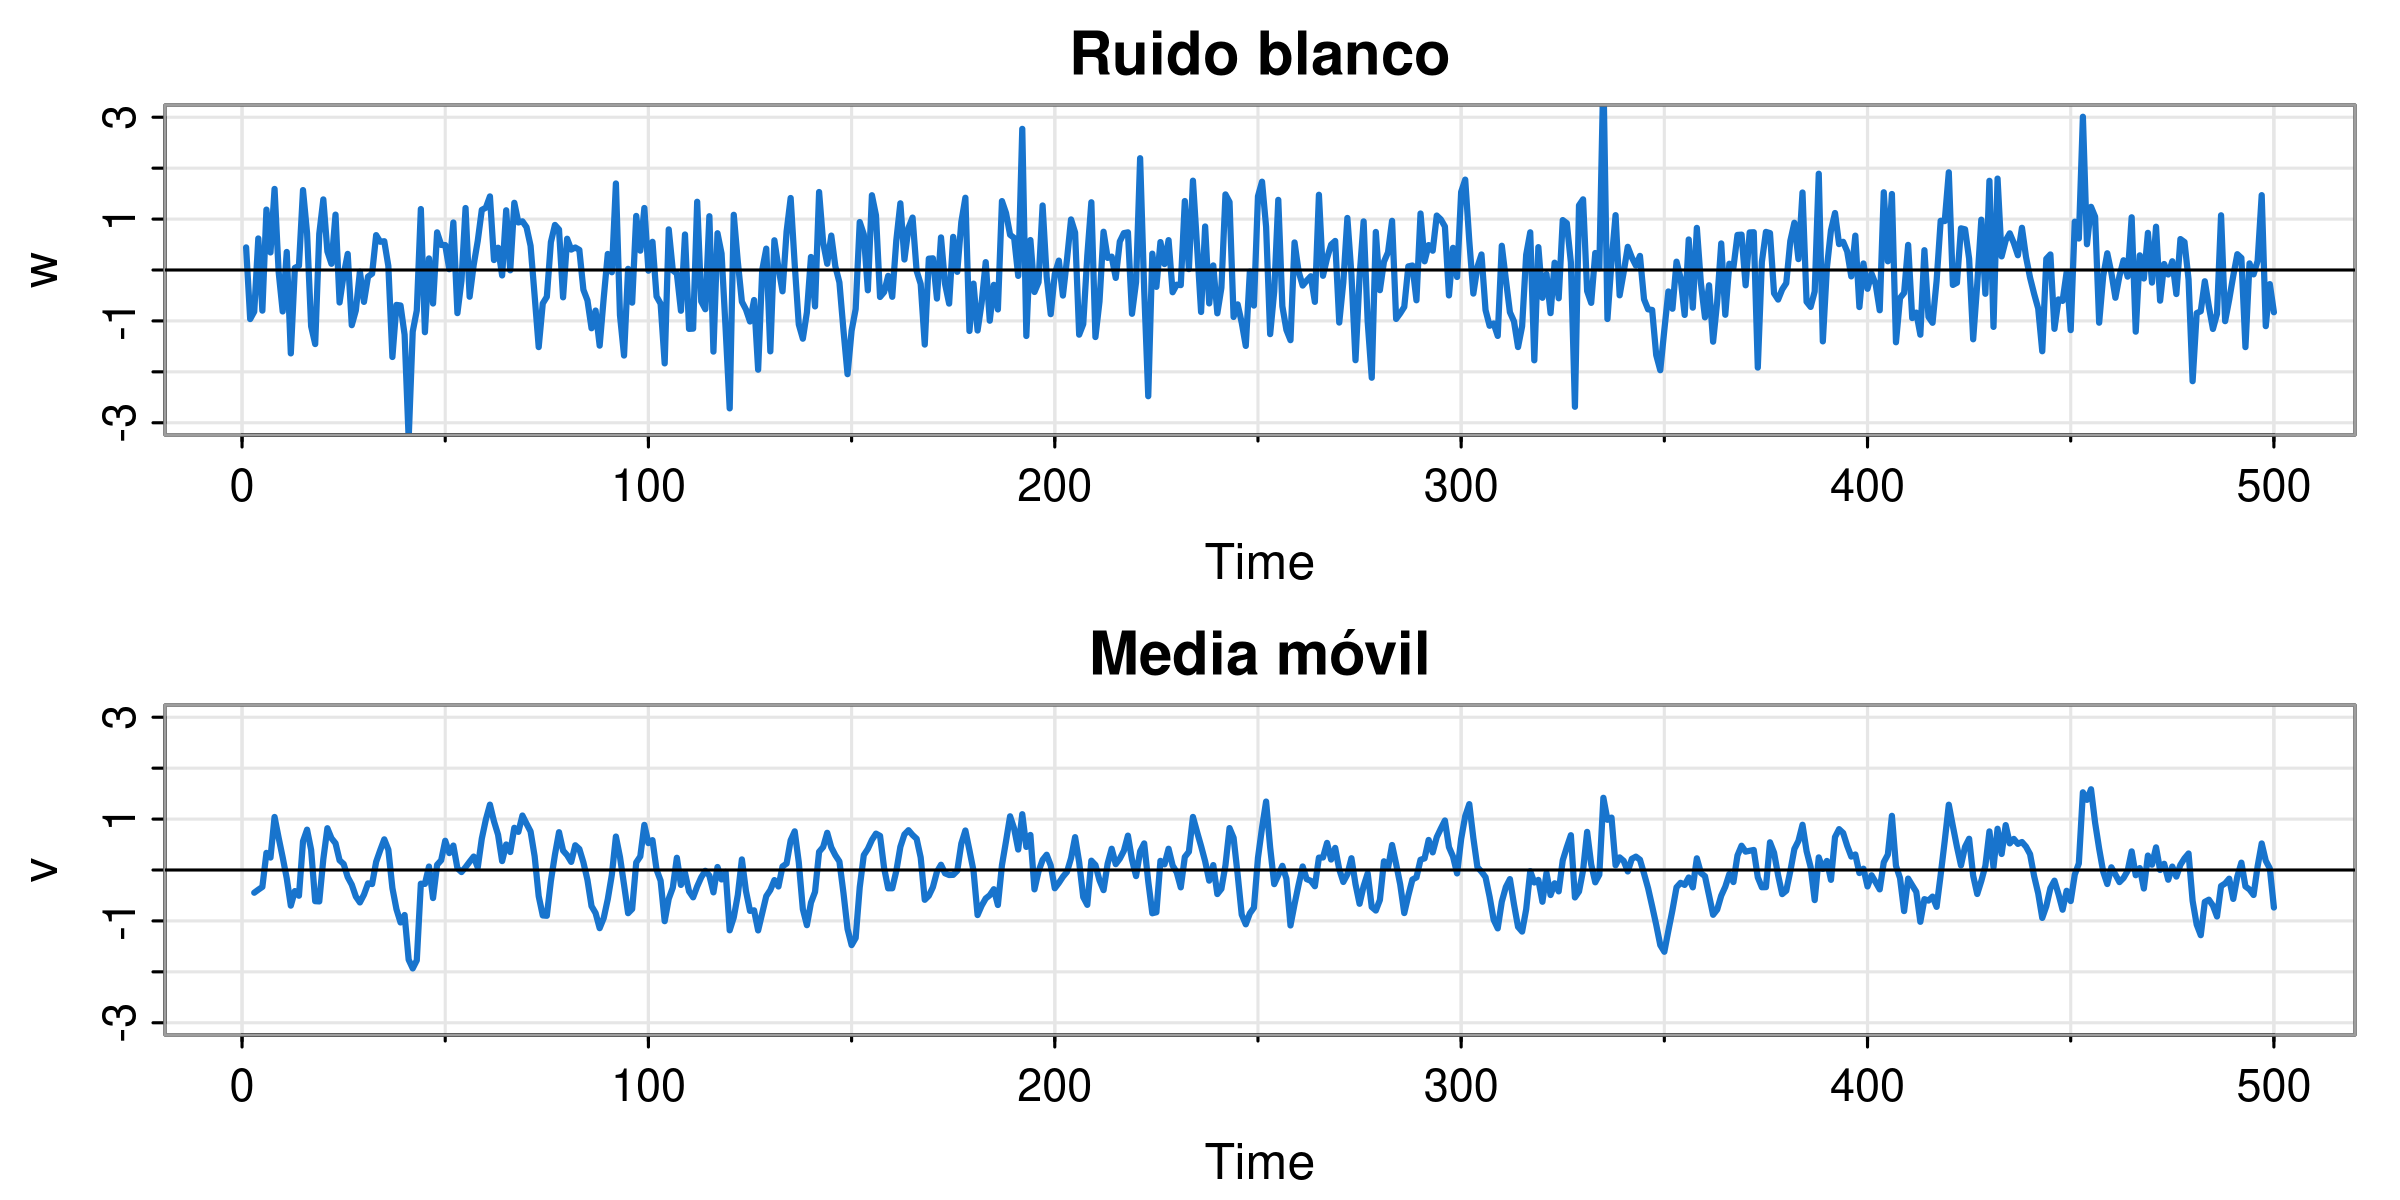

In [12]:
w = rnorm(500,0,1)  # 500 N(0,1) variates
v = filter(w, sides=1, rep(1/3,3))  # moving average
par(mfrow=c(2,1))
tsplot(w, main="Ruido blanco",ylim=c(-3,3), col=4, lwd=2)
abline(0,0)
tsplot(v, ylim=c(-3,3), main="Media móvil", col=4,lwd=2)
abline(0,0)

#### Ejemplo: Paseo al azar con deriva

Si el proceso es:

$$x_t = \delta t + \sum_{j=1}^t w_j$$

con $\{w_j\}$ ruido blanco, entonces $\mu_t = E[x_t] = \delta t$.

#### Ejemplo: Señal más ruido.

Si el proceso es de la forma:

$$x_t = s_t + w_t$$

con $s_t$ una señal dada (ej: función coseno del ejemplo del cuaderno anterior), y $w_t$ ruido de media $0$, entonces $E[x_t] = s_t$.

### Observaciones:

* El comportamiento completo de un proceso estocástico queda definida por *toda la familia* de distribuciones conjuntas de las variables que lo integran $\{x_t\}$.

* Dichas distribuciones deben ser consistentes entre sí (muy difícil de chequear).

* En general es muy difícil trabajar con la distribución conjunta salvo casos excepcionales (ej: Gaussiana)

* La *distribución marginal* de $x_t$ **solo nos dice** cómo se comporta el proceso en tiempo $t$, pero no su interrelación con los demás tiempos.

¿Cómo podemos medir la relación de los valores del proceso en *diferentes momentos del tiempo*?

### Autocovarianza de una serie temporal

La autocovarianza es una medida de la *estructura de dependencia interna* del proceso.

> **Definición:** La *función de autocovarianza* de una serie temporal es la covarianza entre dos instantes de tiempo:
>
> $$\gamma_x(s,t) = \textrm{Cov}(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)].$$
>para cada $s$ y $t$.


**Propiedades:**

* Para $s=t$, $\gamma_x(s,s) = \textrm{Cov}(x_s,x_s) = \textrm{Var}(x_s)$.  

* $\gamma_x(s,t) = \gamma_x(t,s)$ por definición por lo que la función es simétrica.

* Si $\gamma(s,t) = 0$ quiere decir que no hay dependencia lineal (pero no que son independientes).

* Si $\gamma(s,t) = 0$ y $x_s,x_t$ son conjuntamente Gaussianos, entonces $x_s$ y $x_t$ son independientes.



#### Ejemplo: Ruido blanco

Si $x_t = w_t$ ruido blanco, por definición $w_s$ y $w_t$ son no correlacionados, es decir $\textrm{Cov}(w_s,w_t) = 0$. A su vez, a $\textrm{Cov}(w_s,w_s) = \textrm{Var}(w_s) = \sigma^2_w$ se le denomina *potencia* del ruido blanco.

Por lo tanto:

$$\gamma(s,t) = \left\{\begin{array}{ll} \sigma^2_w & s=t \\ 0 & s\neq t \end{array}\right.$$

#### Ejemplo: Media móvil

Considere nuevamente proceso de media móvil:

$$x_t = \frac{1}{3}[w_{t-2} + w_{t-1} + w_t]$$

Aplicando la propiedad de combinaciones lineales citada antes se obtiene:

$$\gamma(s,t) = \begin{cases} 1/9 \sigma_w^2 & s=t-2 \\
2/9 \sigma_w^2 & s=t-1 \\
3/9 \sigma_w^2 & s=t \\
2/9 \sigma_w^2 & s=t+1 \\
1/9 \sigma_w^2 & s=t+2 \\
0 & \text{en otro caso}. \end{cases}$$

Notar que en los dos casos anteriores, $\gamma(s,t)$ solo depende de $t-s$, el *intervalo de tiempo entre las observaciones*.


#### Ejemplo: Paseo al azar

Consideremos un paseo al azar sin deriva $x_t = \sum_{j=1}^t w_j$ con $\{w_j\}$ ruido blanco. La autocovarianza queda:

$$\gamma_x(s,t) = \textrm{Cov}(x_s,x_t) = \textrm{Cov}\left(\sum_{j=1}^s w_j, \sum_{k=1}^t w_k\right) = \min\{s,t\} \sigma_w^2.$$

*Prueba:* usar la propiedad de combinaciones lineales y contar la cantidad de términos que sobreviven usando que $\textrm{Cov}(w_s,w_t)=0$ si $s\neq t$.

Observar que en este caso $\gamma_x$ depende explícitamente de $s$ y $t$ (no solo la diferencia) y que $\textrm{Var}(x_t) = t\sigma_w^2$ es creciente con $t$ (porque acumulamos más términos).

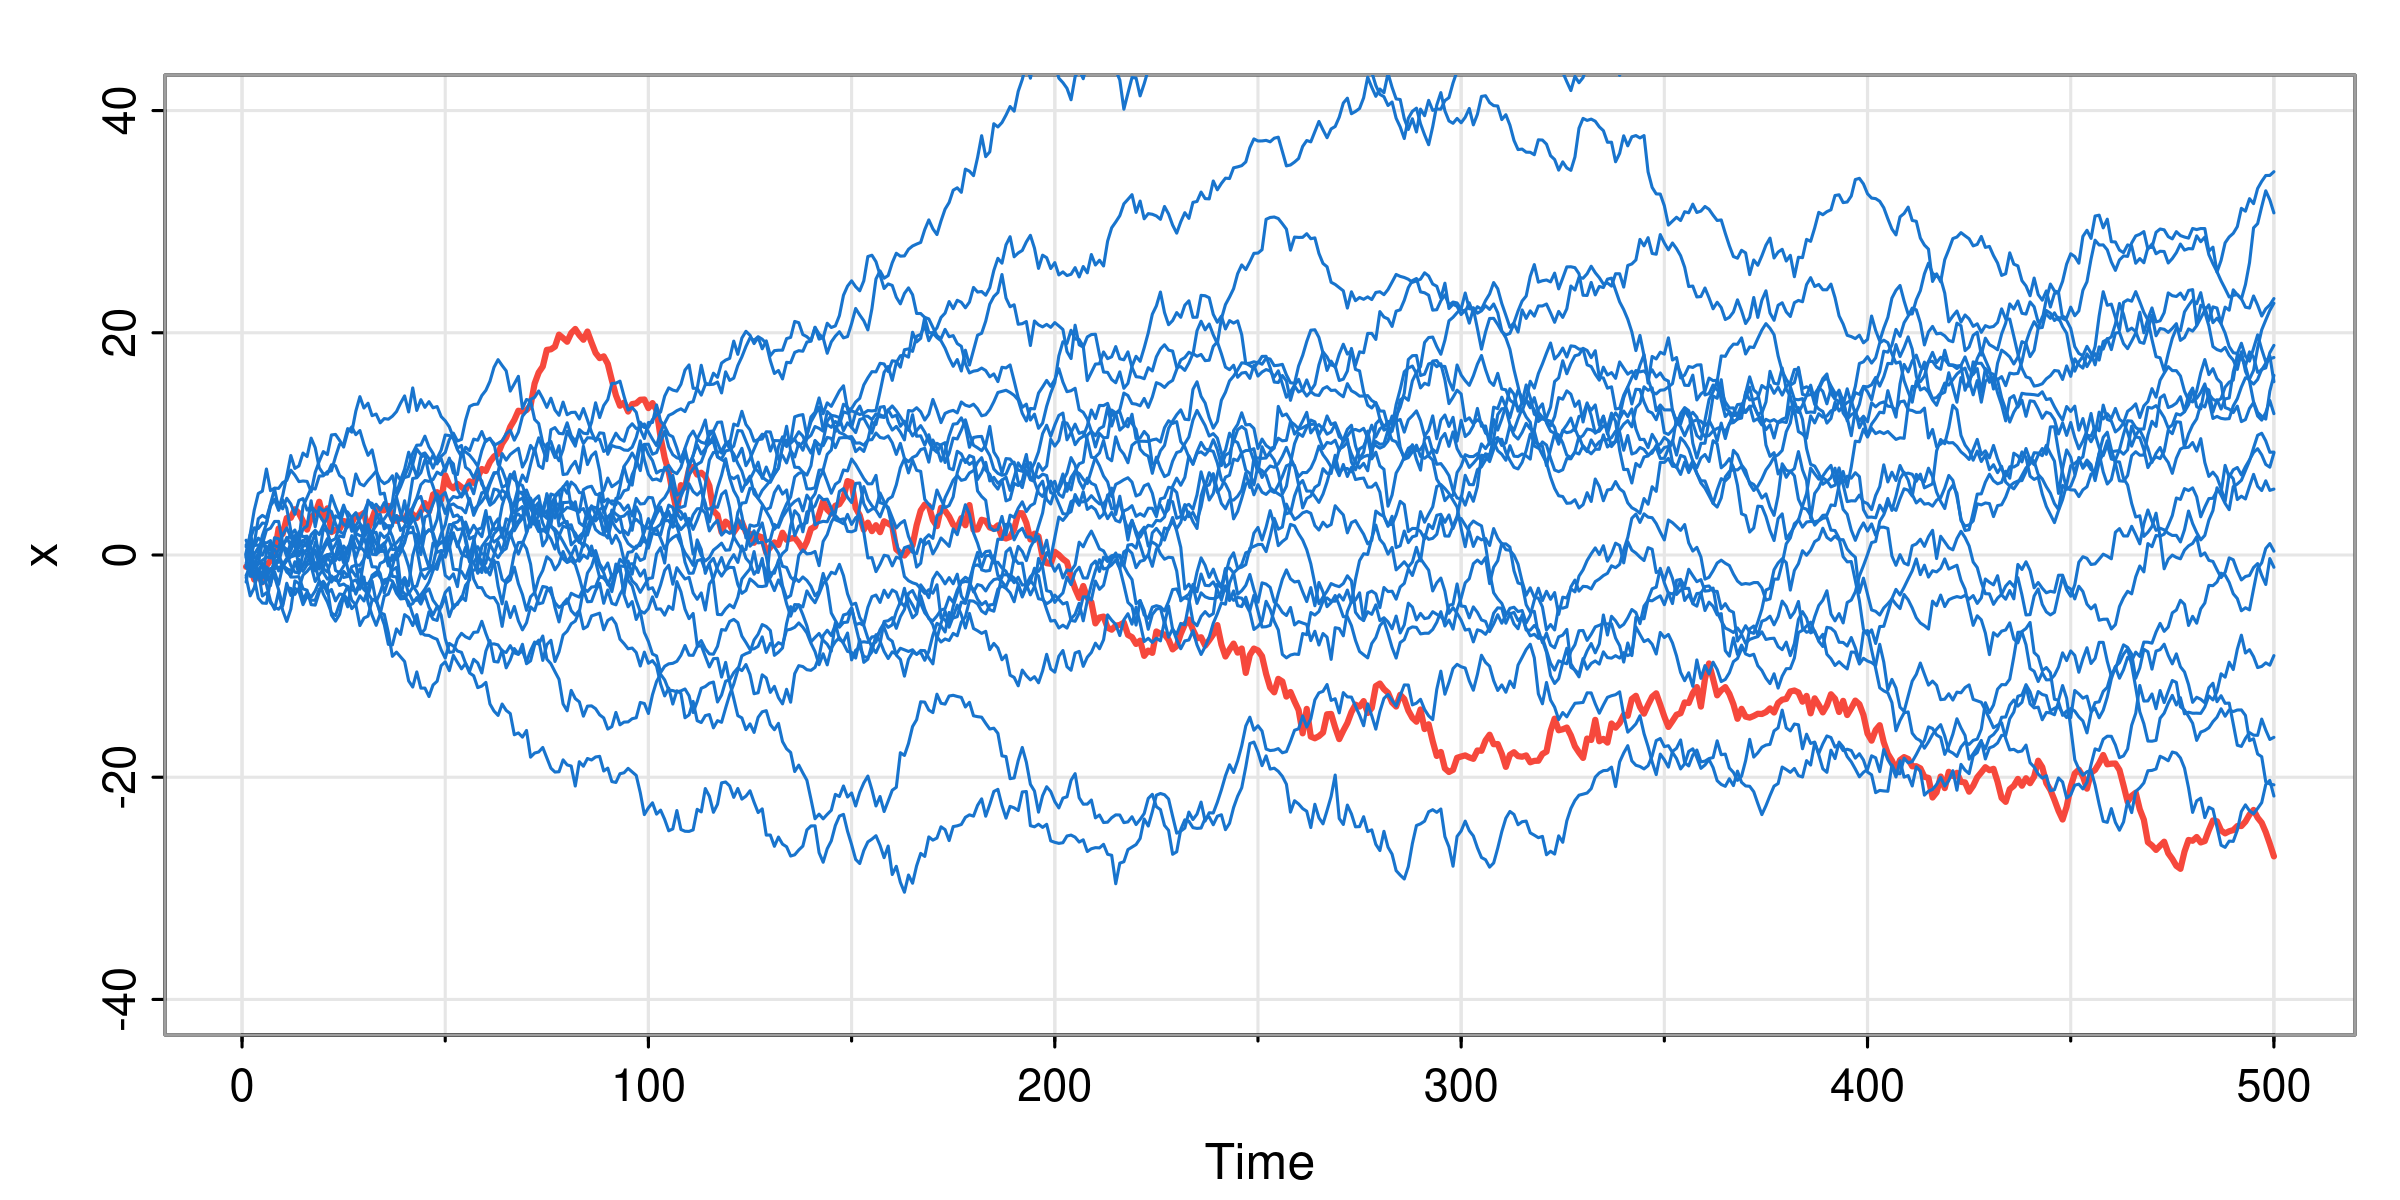

In [13]:
#Ejemplo. 20 simulaciones de paseo al azar sin deriva.

#Sorteo 200 muestras de N(0,1).
w = rnorm(500);

#La suma acumulada (cumsum) produce el paseo al azar
x = cumsum(w);

#Ploteo una trayectoria ajustando los ejes
tsplot(x,ylim=c(-40,40), lwd=2,col=2)

#Sorteo 19 realizaciones más en la misma gráfica.
for (i in 1:19){
    w = rnorm(500); 
    x = cumsum(w);   
    lines(x, col=4, lwd=1)
}


### Autocorrelación de una serie temporal

Como la covarianza depende de la escala del proceso, conviene también definir:

> **Definición:** La función de autocorrelación (ACF) de un proceso o serie de tiempo $x_t$ se define como:
>
> $$ \rho(s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)\gamma(t,t)}}.$$

Nuevamente, mide la relación lineal de la serie en tiempo $t$ a partir de su valor en $s$. 

Igual que antes, se cumple que $-1\leq \rho(s,t) \leq 1$ para todo $s,t$. Si $x_t = ax_s+b$, entonces $\rho$ es $1$ o $-1$ dependiendo del signo de $a$.

#### Ejemplo: Media móvil

Volvamos al proceso de media móvil:

$$x_t = \frac{1}{3}[w_{t-2} + w_{t-1} + w_t]$$

del cual ya calculamos la covarianza. También sabemos que $\gamma(t,t) = 3/9 \sigma_w^2$ pues así lo calculamos para $s=t$. Por lo tanto:

$$\rho(s,t) = \left\{\begin{array}{ll} 1/3 & s=t-2 \\
2/3 & s=t-1 \\
1 & s=t \\
2/3 & s=t+1 \\
1/3 & s=t+2 \\
0 & \text{en otro caso} \end{array}\right..$$

Notar que nuevamente $\rho(s,t)$ solo depende de $t-s$ y a su vez ahora es independiente del tamaño del ruido.


### Correlación cruzada de series.

La idea aquí es definir la misma idea de correlación de una serie pero para relacionar una serie $\{x_t\}$ con otra $\{y_t\}$.

> **Definición:** La *covarianza cruzada* (o cross-covariance) de dos series se define como:
>
$$ \gamma_{xy}(s,t) = E[(x_s - \mu_{xs})(y_t - \mu_{yt})].$$

> **Definición:** La *correlación cruzada* (o cross-correlation) de dos series se define como:
>
$$ \rho_{xy}(s,t) = \frac{\gamma_{xy}(s,t)}{\sqrt{\gamma_x(s,s)\gamma_y(t,t)}}.$$



## Procesos estacionarios

Las definiciones anteriores son para cualquier proceso. Nos interesa en particular aquellos procesos que no cambian sus características en la ventana de tiempo que se miran. Dichos procesos se dicen *estacionarios*.

> **Definición:** Un proceso se dice *estacionario* (en sentido estricto) si la función de distribución conjunta de $\{x_{t_1},\ldots,x_{t_k}\}$ es idéntica a la de
> $\{x_{t_1+h},\ldots,x_{t_k+h}\}$, para cualquier selección de los tiempos $t_i$, cualquier $k$ y $h$ enteros.

**Observación**: muy difícil de chequear. En particular, la media $\mu$ debe ser constante, así como la varianza y la distribución marginal de $x_t$ en todo momento del tiempo. 

### Propiedad de los procesos estacionarios:

Una propiedad importante es la siguiente: si $\{x_s,x_t\}$ tiene la misma distribución que $\{x_{s+h},x_{t+h}\}$ entonces la autocovarianza debe cumplir

$$\gamma(s,t) = \gamma(s+h,t+h)$$

para todo $h$. En particular, tomando $h=-s$:

$$\gamma(s,t) = \gamma(0,t-s) = \gamma(t-s).$$

Es decir la autocovarianza solo depende del *lag* $h=t-s$, la distancia entre las muestras.

### Procesos estacionarios en sentido débil

Un proceso estocástico o serie temporal $\{x_t\}$ se dice estacionaria (en sentido débil, pero diremos estacionaria de aquí en más) si se cumple que:

* La media $\mu_t = E[x_t] = \mu$ es constante para todo $t$.
* La autocovarianza $\gamma(s,t)$ solo depende de $s$ y $t$ a través de su diferencia $|t-s|$. En general la denotaremos como $\gamma(h)$ siendo $h$ el lag. Observar que $\gamma(-h) = \gamma(h)$ y $\gamma(0)=\textrm{Var}(x_t)$.

**Observación:** Estacionario estricto $\Rightarrow$ estacionario.



### Función de autocorrelación de un proceso estacionario.

Se define como:

$$\rho(h) = \frac{\gamma(t+h,t)}{\sqrt{\gamma(t+h,t+h)\gamma(t,t)}} = \frac{\gamma(h)}{\gamma(0)}.$$

Notar que la función es simétrica y $\rho(0)=1$.


### Estacionariedad conjunta

Dos series temporales son *conjuntamente estacionarias* si cada una es estacionaria y la función de covarianza cruzada (cross-covariance) solo depende del lag $h$:

$$\gamma_{xy}(t,s) = \gamma_{xy}(0,t-s) = \gamma_{xy}(h).$$

La función de correlación cruzada se define entonces de manera análoga:

$$\rho_{xy}(h) = \frac{\gamma_{xy}(h)}{\sqrt{\gamma_x(0)\gamma_y(0)}}.$$

### Ejemplos:

* El ruido blanco del ejemplo anterior.

* La media móvil del ejemplo anterior.

* Un proceso autorregresivo *en estado estacionario*, es decir, una vez que se olvidó de la condición inicial

* NO SON EJEMPLOS: el paseo al azar (con o sin deriva). Señal escondida en el ruido. 

## Estimación de la correlación a partir de muestras

**Problema:** La función de autocorrelación está bien definida, pero si no tenemos el modelo debemos estimarla a partir de observaciones.

**Desafío:** en el caso de variables $iid$ promediando podíamos hallar media y varianza. El problema aquí es que en general disponemos de una única realización de la serie de tiempo!

**Idea:** En el caso de series estacionarias, podemos utilizar las propias muestras, ya que las características de la serie no cambian con el tiempo.

### Estimador de la media:

Sea $x_t$ un proceso estacionario. Se tiene el siguiente estimador para la media $\mu$:

$$\bar{x} = \frac{1}{n} \sum_{t=1}^n x_t$$

La varianza de este estimador se puede calcular a partir de la correlación del proceso:

$$\textrm{Var}(\bar{x}) = \frac{1}{n} \sum_{h=-n}^n \left(1-\frac{|h|}{n}\right)\gamma(h).$$

### Estimador de la autocorrelación:

La *autocovarianza muestral* de una realización $\{x_t\}$ de una serie de tiempo estacionaria se define como:

$$ \hat{\gamma}(h) = \frac{1}{n} \sum_{t=1}^{n-h}(x_{t+h}-\bar{x})(x_t-\bar{x}).$$

con $\hat{\gamma}(-h) = \hat{\gamma}(h)$ y $h=0,1\ldots,n-1$.

La *autocorrelación muestral* se define como:

$$\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}.$$


### Propiedad (distribución asintótica de la ACF)

Si el proceso es ruido blanco (con momentos finitos, en particular ruido blanco gaussiano), entonces para una muestra grande ($n\to\infty$), la estimación anterior de la ACF es asintóticamente gaussiana con desvío:

$$\sigma_{\rho(h)} = \frac{1}{\sqrt{n}}.$$

* Otra forma de verlo: si es ruido blanco, 95% de las autocorrelaciones ($h>0$) estimadas caen a $\pm \frac{2}{\sqrt{n}}$ de $0$. Entonces si una medida de autocorrelación cae fuera de este intervalo es porque no proviene de ruido blanco.

* Dicho de otro modo, si uno "blanquea" la señal (se queda solo con la parte de ruido), tenemos un test para chequear que lo que obtuvimos sea ruido blanco.

### Ejemplo: ruido blanco

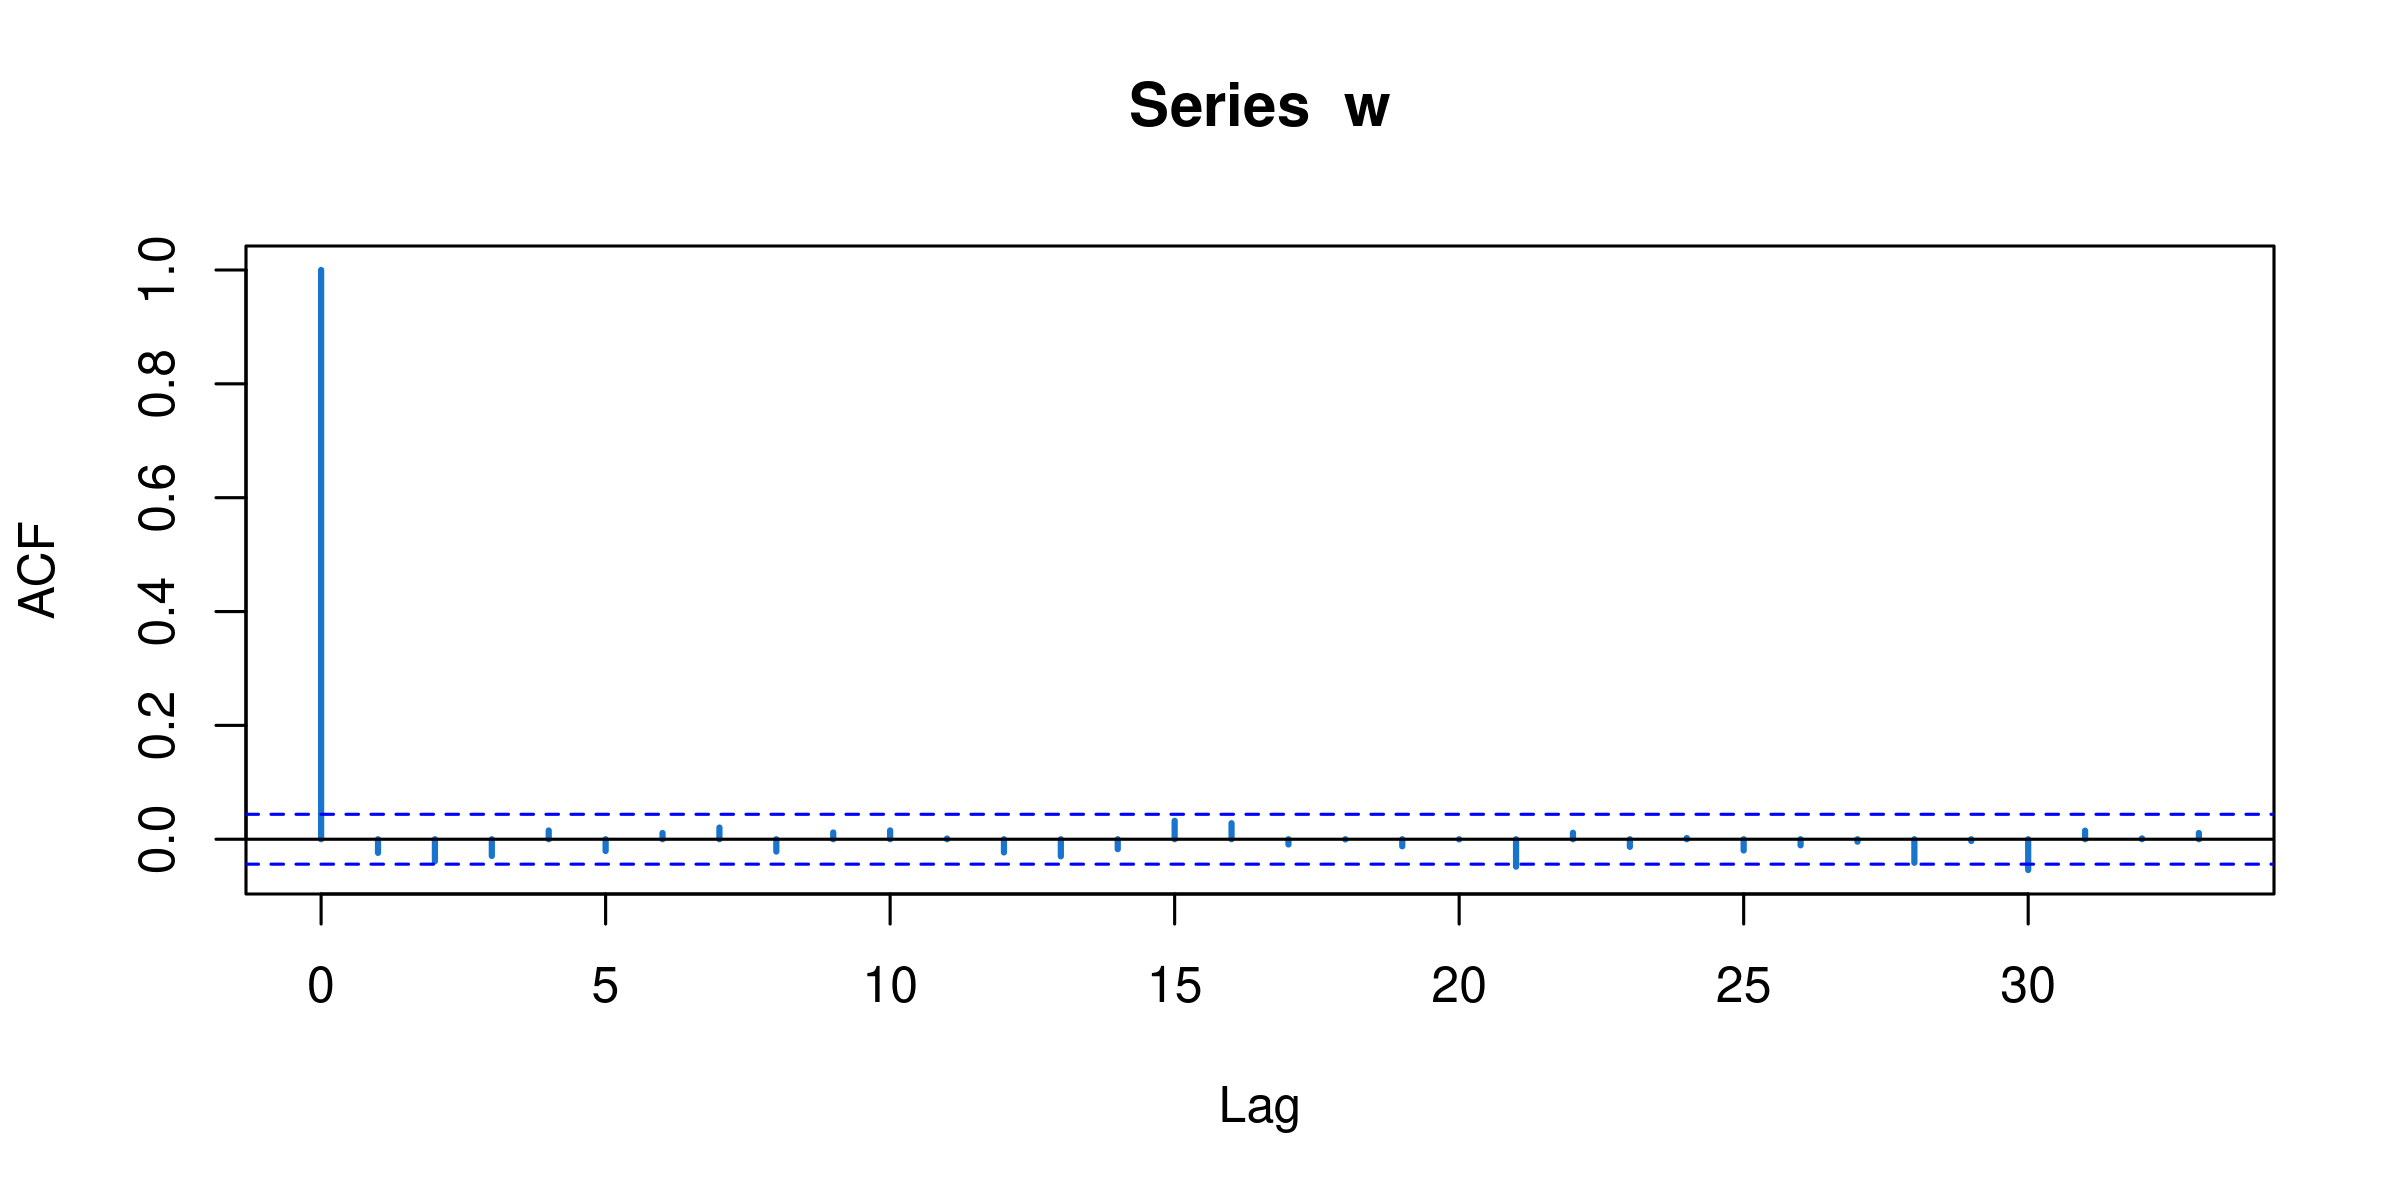

In [14]:
w = rnorm(2000)
acf(w, col=4, lwd=2)

### Ejemplo: proceso autorregresivo

Consideremos el proceso:

$$x_t = 0.8 x_{t-1} + w_t$$

siendo $w_t$ ruido blanco gaussiano de varianza $\sigma_w^2=1$.



### Simulación

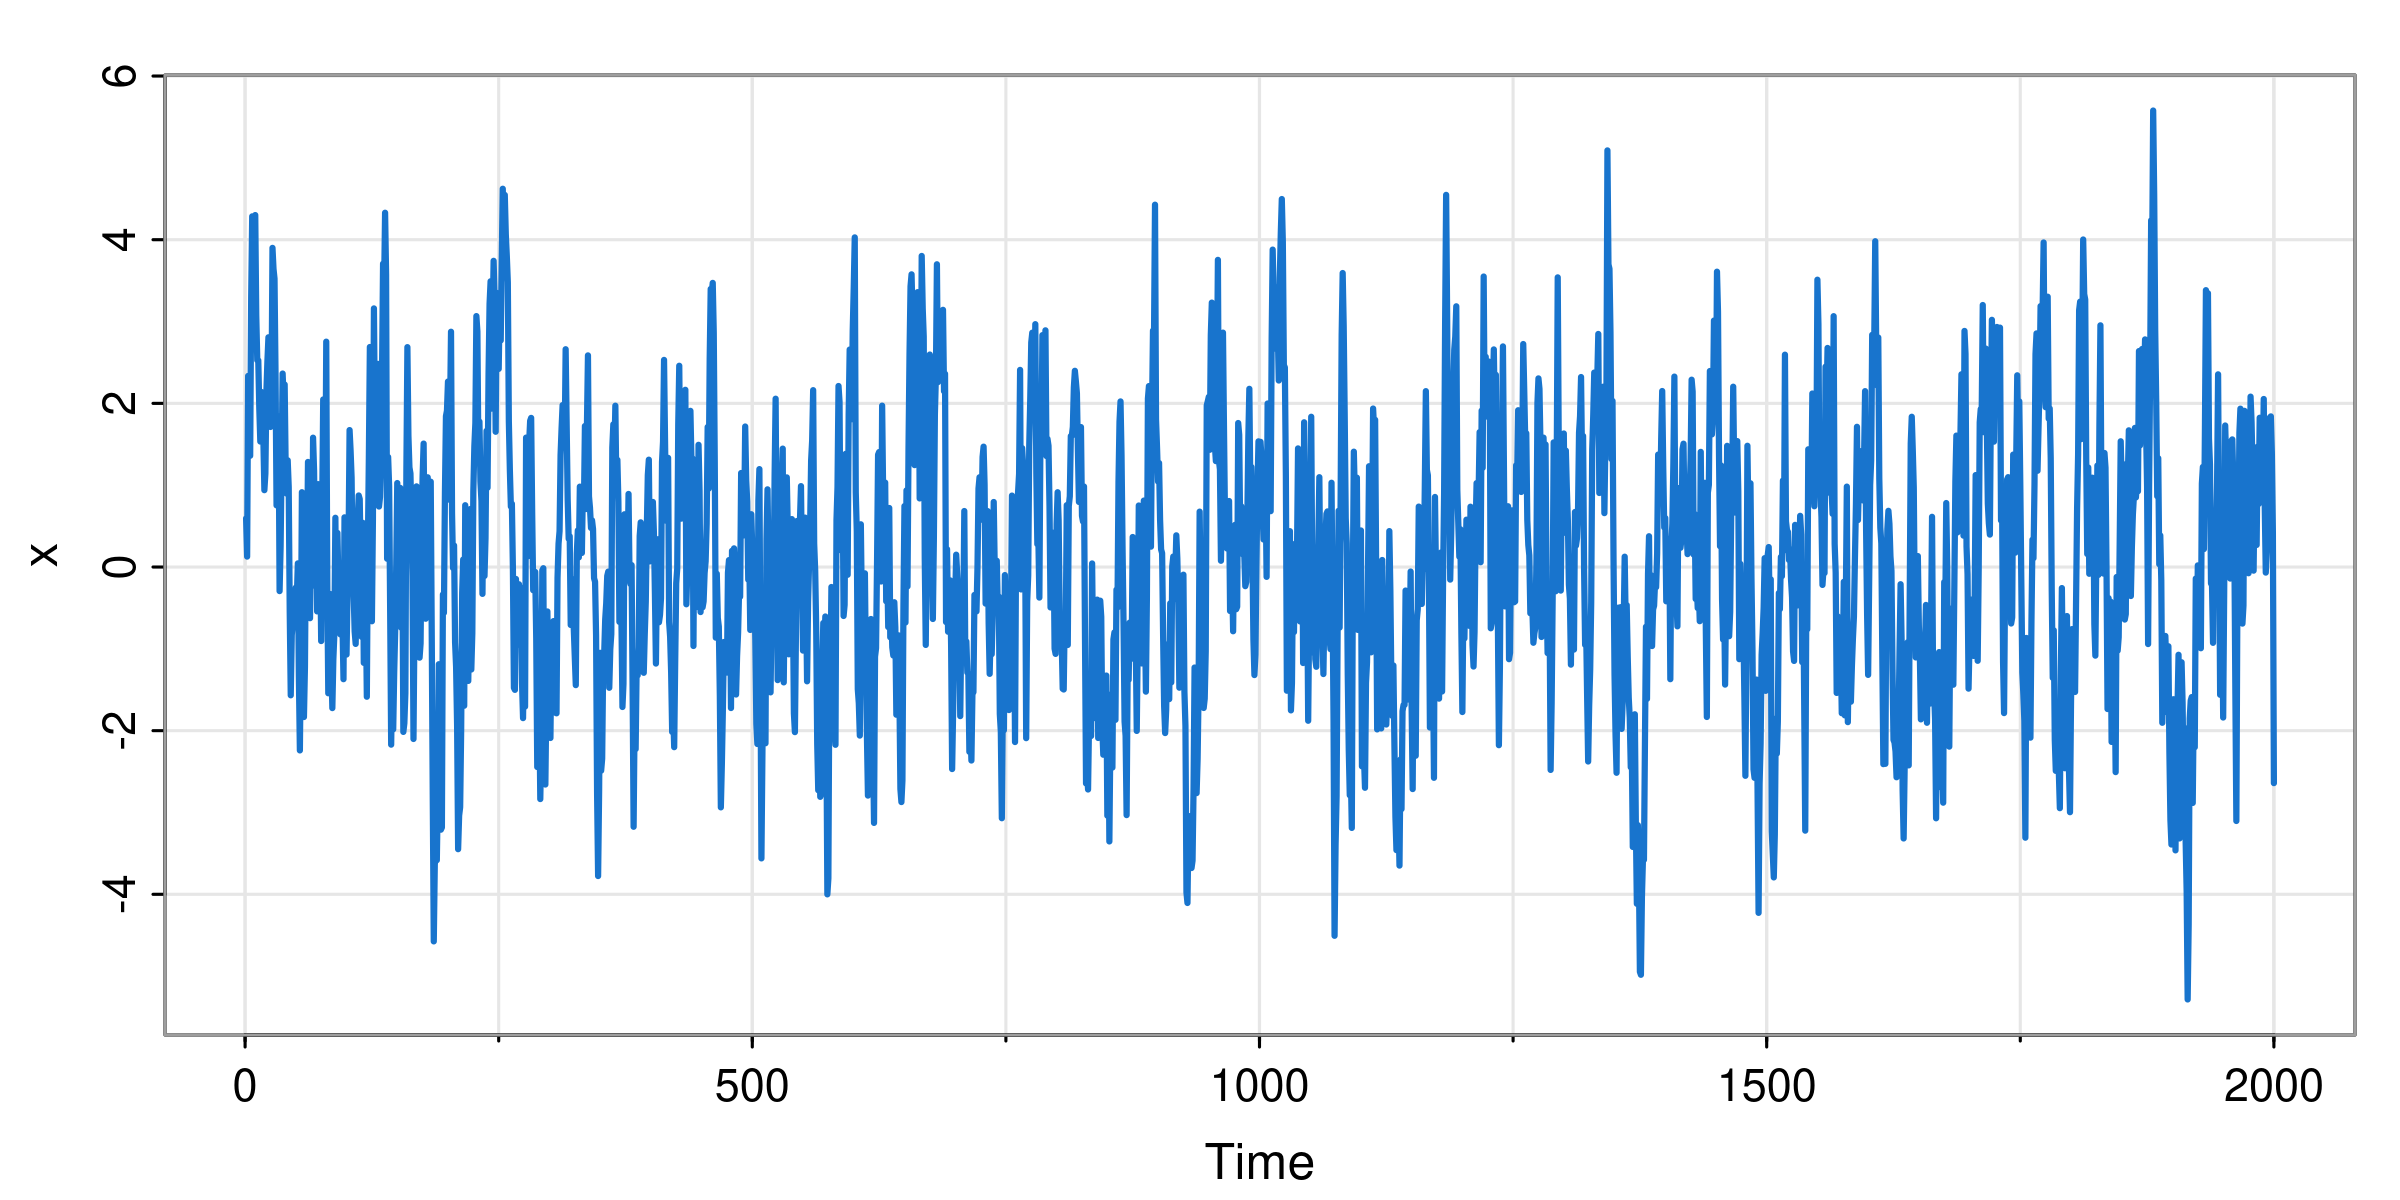

In [15]:
w = rnorm(2000)
#probar cambiar 0.8 por otros valores para ver los cambios. En particular -0.8
x = filter(w,filter=c(0.8),method="recursive")

tsplot(x, col=4, lwd=2)

### Función de autocorrelación

Estimemos la autocorrelación: en un proceso de este tipo, la ACF decae exponencialmente, ya que cada valor depende del anterior, que a su vez depende del anterior, etc. La memoria se va perdiendo con el tiempo.

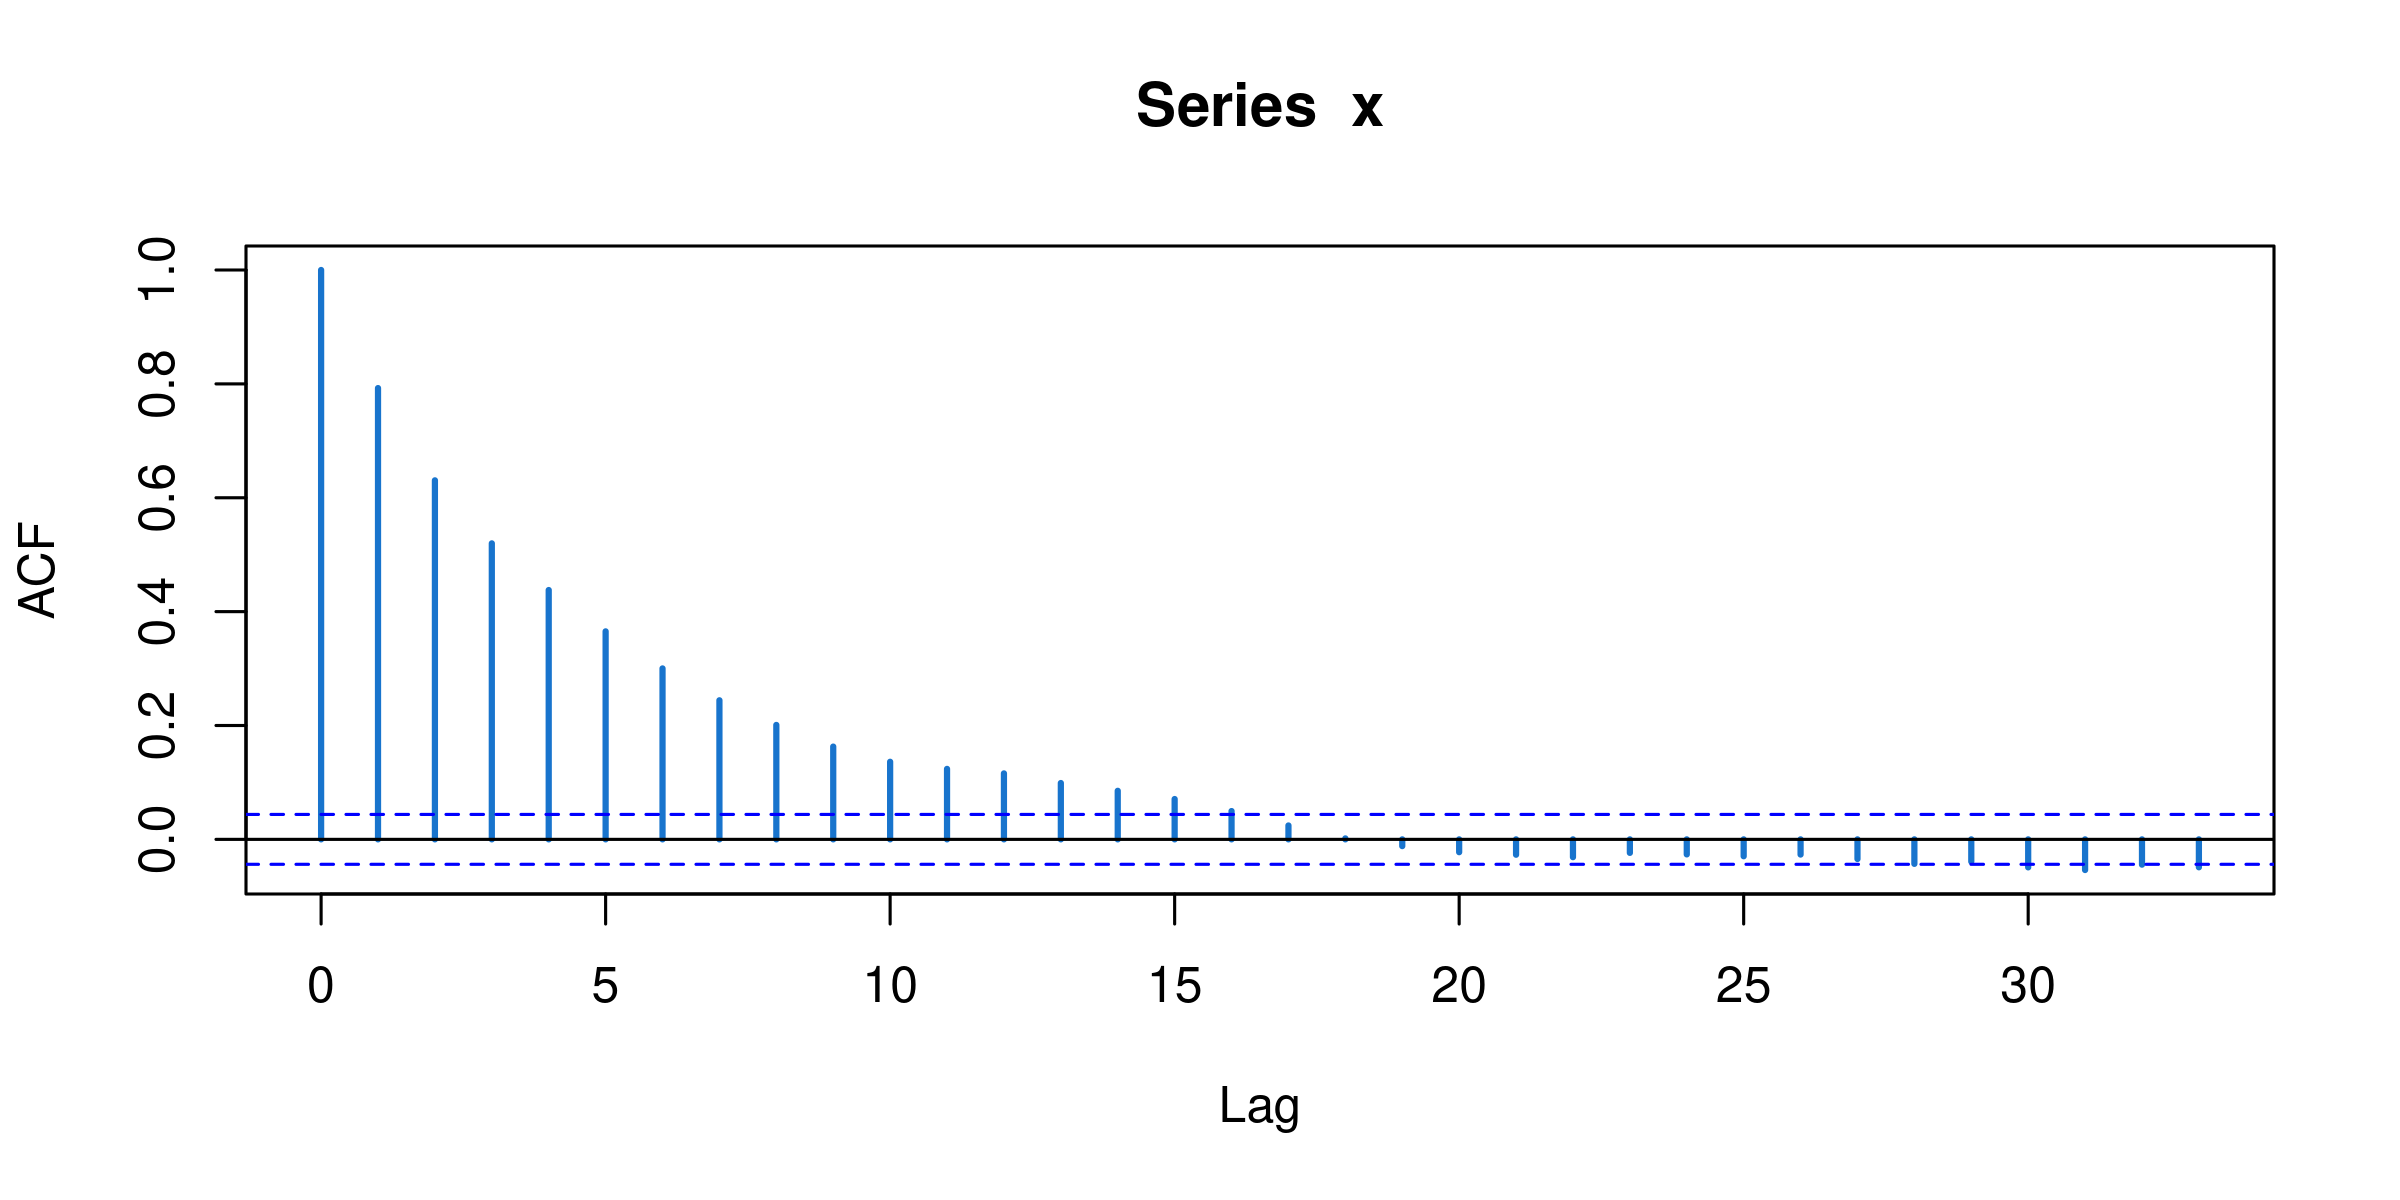

In [16]:
acf(x, col=4, lwd=2)

### Correlograma con lags

Otra forma de entender lo anterior es graficar las parejas $(x_{t-h},x_t)$ en el plano, para diferentes valores del "lag" $h$. Básicamente la autocorrelación de lag $h$, $\hat{\rho}(h)$ es el coeficiente de correlación entre las variables $x_t$ y $x_{t-h}$.

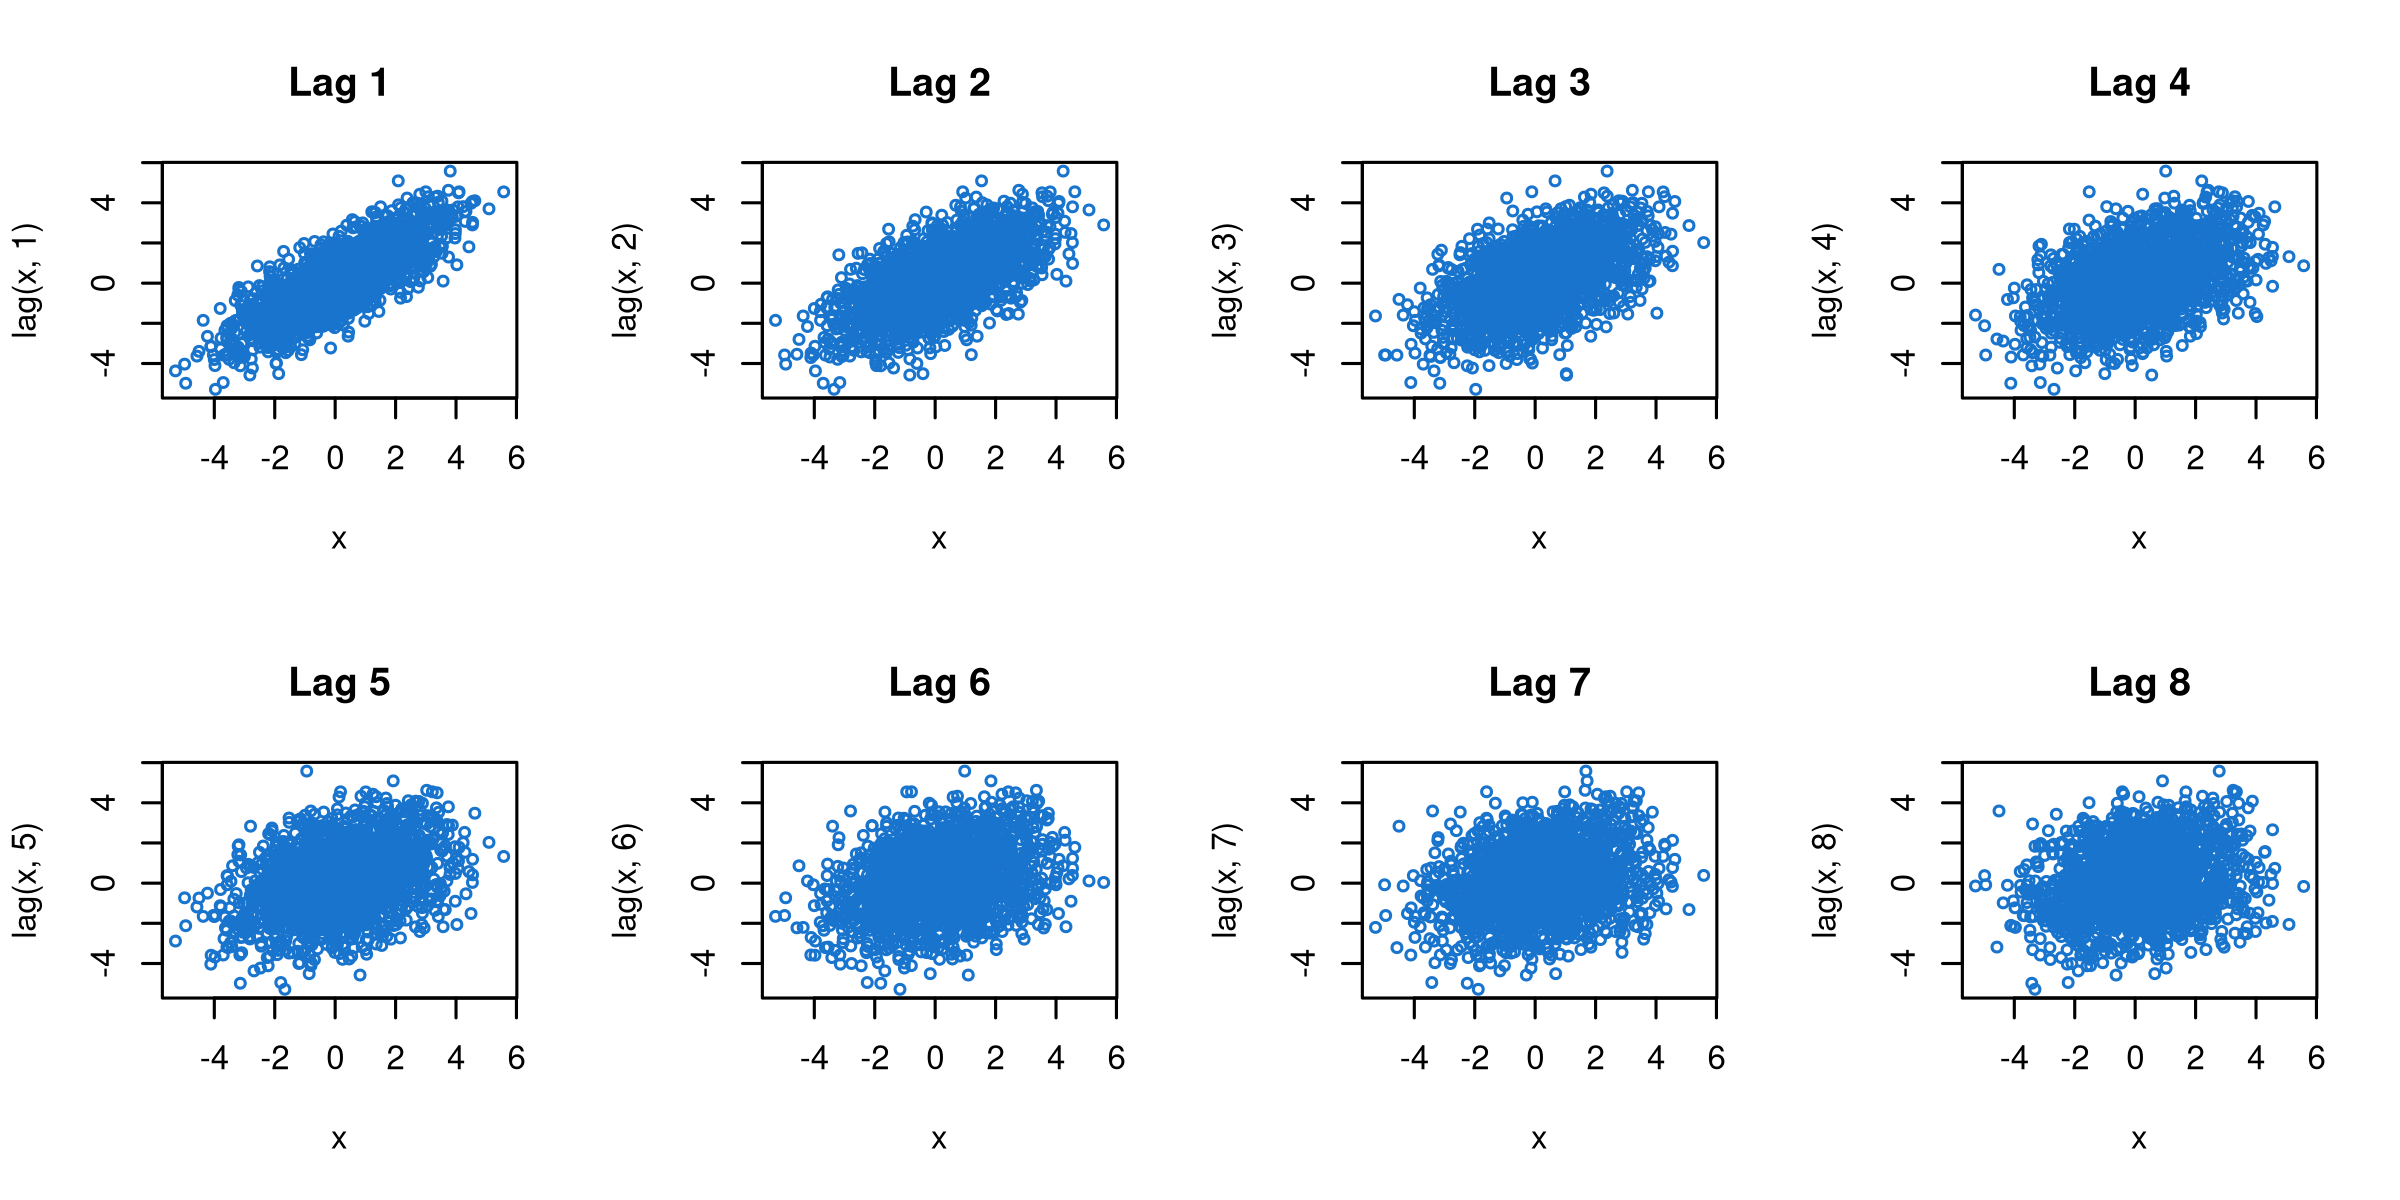

In [17]:
par(mfrow=c(2,4)) #graficamos 8 lags, a medida que aumenta el lag hay menos correlacion.
plot(x,lag(x,1), main="Lag 1", col=4)
plot(x,lag(x,2), main="Lag 2", col=4)
plot(x,lag(x,3), main="Lag 3", col=4)
plot(x,lag(x,4), main="Lag 4", col=4)
plot(x,lag(x,5), main="Lag 5", col=4)
plot(x,lag(x,6), main="Lag 6", col=4)
plot(x,lag(x,7), main="Lag 7", col=4)
plot(x,lag(x,8), main="Lag 8", col=4)

## Ejercicio

1. Simular una señal de ruido blanco y estimar su autocorrelación. Probar con $n=50$, $n=200$ y $n=2000$ datos y discutir las diferencias.
2. Simular el proceso de media móvil visto anteriormente y estimar su autocorrelación. Probar nuevamente con $n=50$, $n=200$ y $n=2000$ datos y discutir las diferencias.
3. Simular el proceso autorregresivo visto anteriormente y repetir la pregunta anterior. Discutir las diferencias entre los 3 procesos.

Sugerencia: usar los comandos `filter` y `acf` de R.

## Ejercicio

Consideremos la serie temporal dada por:

$$x_t = \beta_0 + \beta_1 t + w_t,$$

con $\beta_0$ y $\beta_1$ coeficientes y $w_t$ es ruido blanco gaussiano de varianza $\sigma_w^2$.

1. Simule y grafique $n=100$ valores de esta serie, tomando $\beta_0=50$, $\beta_1=0.2$, $\sigma^2_w =9$, $t=(1,\ldots,100)$.

2. ¿La serie es estacionaria?

3. ¿Cómo podría estimar $\beta_0$ y $\beta_1$ a partir de las observaciones?

4. Mostrar que el proceso $y_t = x_t − x_{t−1}$ es estacionario. ¿Qué media tiene? Utilice el comando `diff` de `R` para calcular $y_t$ y graficarlo. Estimar su autocorrelación.